In [31]:
import matplotlib.pyplot as mp
import numpy as np
import optical
import lightcurves
import sys
#from ipywidgets import widgets
%matplotlib inline 


In [32]:
target = 'NGC3201'
folder = '/Users/jrneeley/CRRP/'+target+'/'
optical_folder = '/Users/jrneeley/CRRP/OpticalCatalogs/'
#folder = '/Users/Jill/CRRP/'+target+'/'
#optical_folder = '/Users/Jill/CRRP/OpticalCatalogs/'

## Read in variables from Clement catalog

In [33]:
#dtype1 = np.dtype([('id', 'S10'), ('period', float)])
#data = np.loadtxt(folder+target+'-clement.txt', dtype=dtype1, usecols=(0,3))
dtype2 = np.dtype([('id', 'S10'), ('old_period', float), ('new_period', float)])
data = np.loadtxt(folder+target+'-variables.txt', dtype=dtype2)

datasets, colors = optical.compile_datasets(target, old=0, folder=folder, returnColors=True)





Datasets:

     Y0701  95202 2007-01-13 2007-01-23 k
    lcogt2  69985 2013-03-14 2013-03-23 r
     Y0704  24334 2007-03-31 2007-04-13 b
    zingle  15701 1996-04-16 1996-04-19 g
      lee4  11616 2012-02-18 2012-02-23 m
     west1  11444 2005-02-11 2005-02-13 c
     wfi13  10623 2003-06-04 2003-06-06 xkcd:brown
    lcogt3   9918 2014-03-02 2014-03-02 xkcd:coral
    ct1204   8009 2012-04-24 2012-04-24 xkcd:purple
  efosc08a   7693 2008-04-19 2008-04-19 xkcd:maroon
     bond6   7436 1998-04-17 1998-04-22 xkcd:olive
      wfi6   6815 2002-02-20 2002-02-20 xkcd:tan
     B1201   6727 2012-01-06 2012-01-11 xkcd:grey
     wfi22   5403 2000-02-27 2000-02-27 xkcd:teal
efosc1101b   5379 2011-01-21 2011-01-21 xkcd:tomato
      lee2   5052 2011-05-30 2011-06-03 xkcd:orchid
     wfi41   4855 2012-02-24 2012-02-27 xkcd:goldenrod
     wfi11   4648 1999-12-05 1999-12-05 xkcd:orange
     west2   4238 2005-05-05 2005-05-05 xkcd:khaki
     dec97   3928 1997-12-25 1997-12-25 xkcd:darkgreen
  emmi0601  

V66 0.284


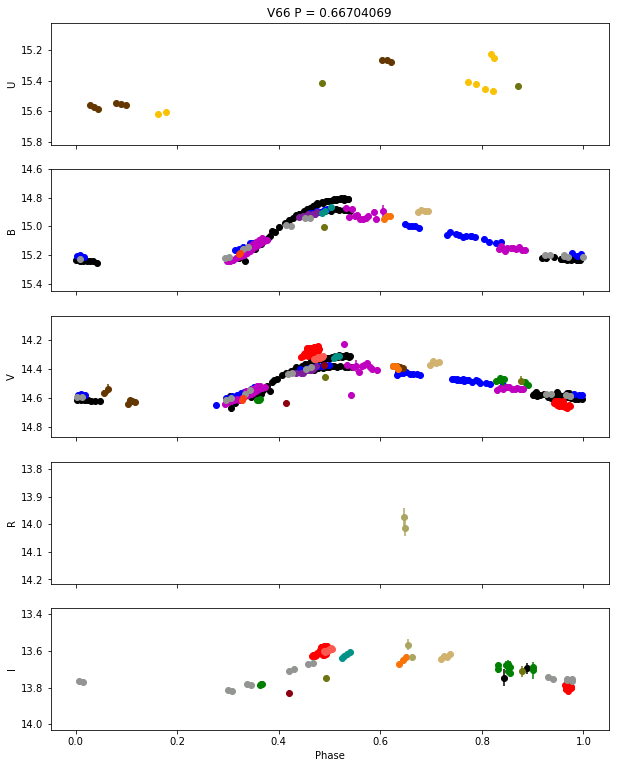

[ 0.6609067   0.66151006  0.66473595  0.68432029  0.68458662  0.6853523
  0.69019685  0.6992159   0.70865143  0.72509907]


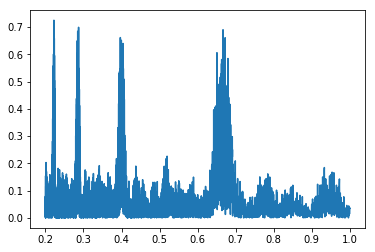

array([ 0.67238249,  0.39692747,  0.22293817,  0.28487991,  0.28618449,
        0.6670002 ,  0.66682227,  0.2871708 ,  0.22232351,  0.22234329])

In [69]:
ind=62
print data['id'][ind], data['old_period'][ind]
lcv = data['id'][ind]
initial_period = data['new_period'][ind]
lcv_file = folder+'lcvs/optical/'+target+lcv+'.lcv'

U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)


#lightcurves.plot_phased_optical_lcv(U, B, V, R, I, data['new_period'][ind], data['id'][ind], datasets, error_threshold=0.1, plot_save=1, folder=folder)
#lightcurves.plot_phased_optical_lcv(U, B, V, R, I, data['new_period'][ind], data['id'][ind], datasets, error_threshold=0.1)
#lightcurves.plot_phased_optical_lcv(U, B, V, R, I, data['old_period'][ind], data['id'][ind], datasets, error_threshold=0.05)
lightcurves.plot_phased_optical_lcv(U, B, V, R, I, initial_period, lcv, datasets, error_threshold=0.05, colors=colors)


#broad Lomb Scargle
lightcurves.period_search_LS(V, lcv)

Max precision = 10^7.0


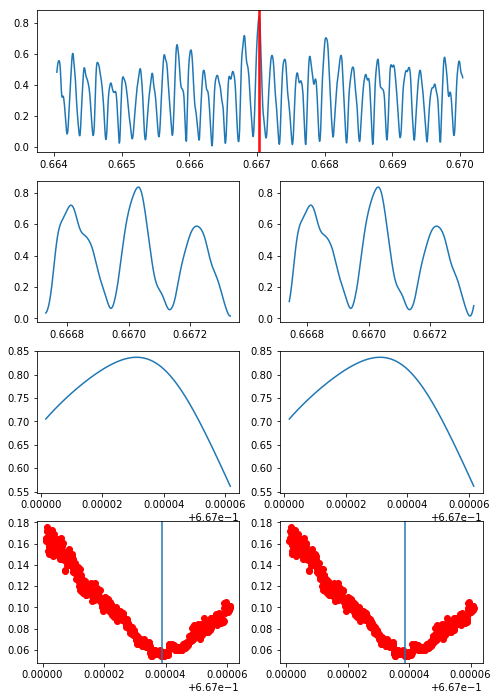

[ 0.66703876  0.66703876]
Star  Period  Period_new
V66 0.66704069 0.667038755244


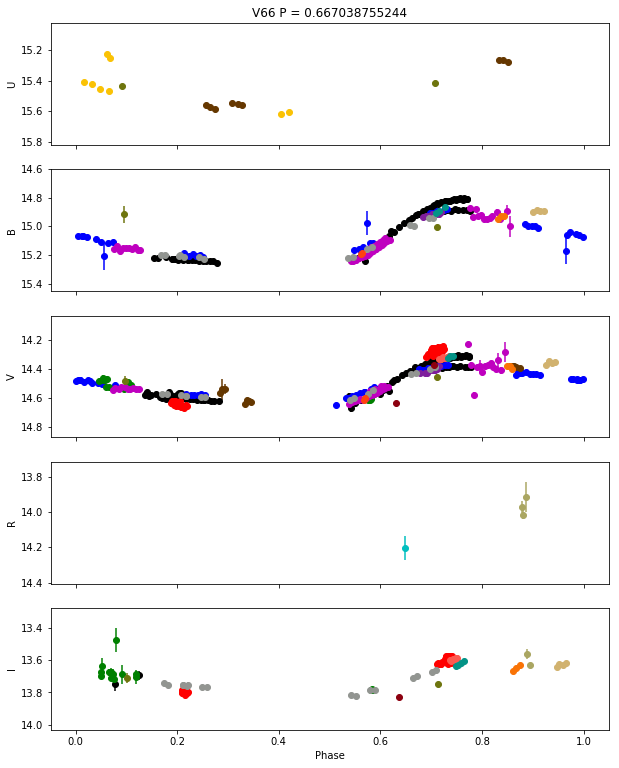

In [70]:
period = lightcurves.period_search_hybrid(V, initial_period, lcv, search_window=0.006, second_band=B, error_threshold=0.1)
#period = lightcurves.period_search_hybrid(V, 0.484, data['id'][ind], search_window=0.006, second_band=B, error_threshold=0.1)
print 'Star  Period  Period_new'
print lcv, initial_period, period
lightcurves.plot_phased_optical_lcv(U, B, V, R, I, period, lcv, datasets, error_threshold=0.1, colors=colors)

In [34]:
for ind2, star in enumerate(data['id']):
    lcv_file = folder+'lcvs/optical/'+target+data['id'][ind2]+'.lcv'
    U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)
    lightcurves.plot_phased_optical_lcv(U, B, V, R, I, data['new_period'][ind2], data['id'][ind2], datasets, plot_save=1, folder=folder, colors=colors)

# Generate MIR light curves matching optical ID number

In [5]:
dtype1 = np.dtype([('star', 'S10'), ('dao', int)])
data = np.loadtxt(folder+'PeterIDs.txt', dtype=dtype1)

lightcurves.make_lcv(['I1', 'I2'], data['star'], data['dao'], folder=folder)


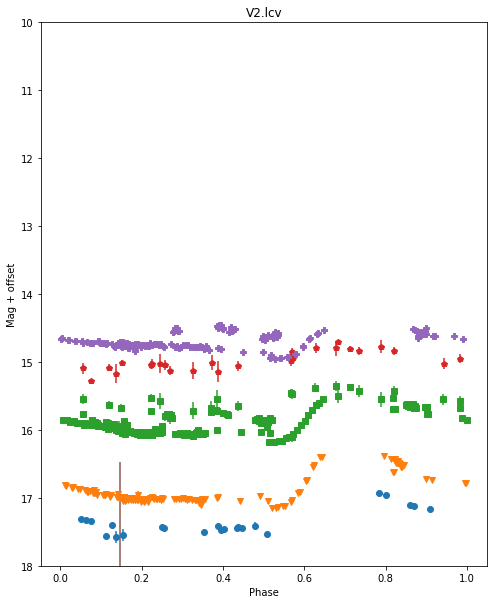

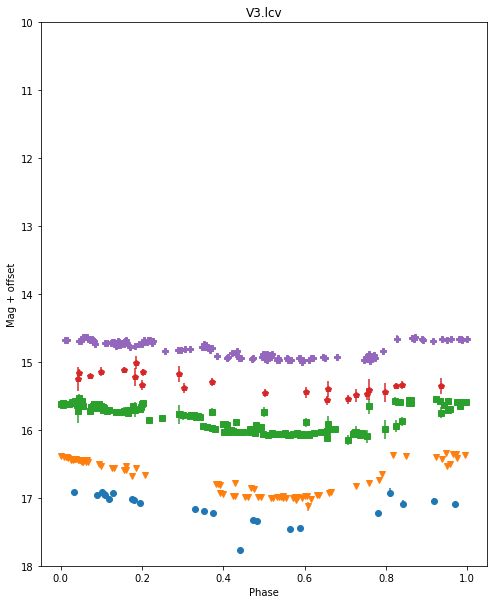

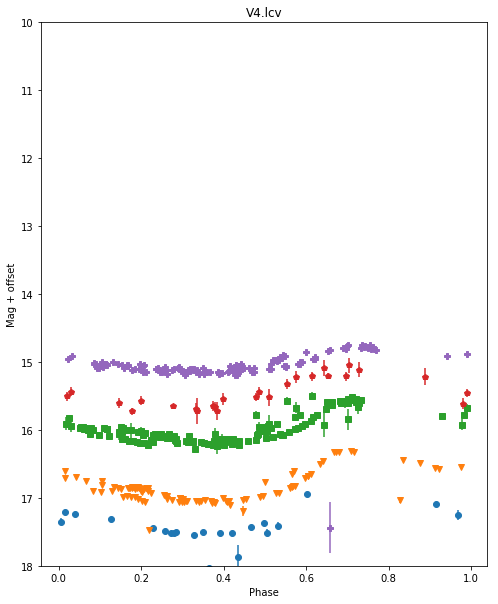

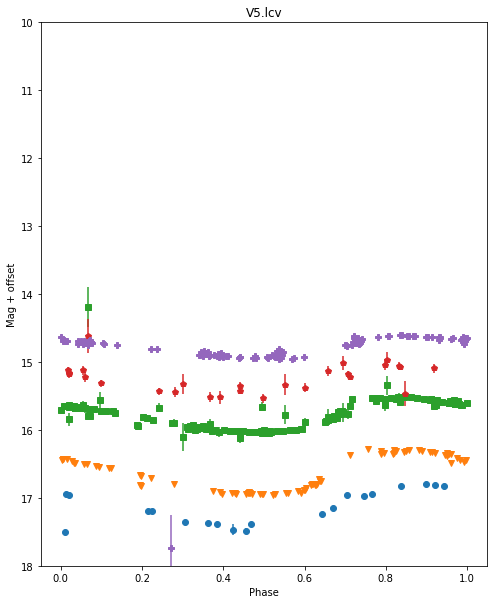

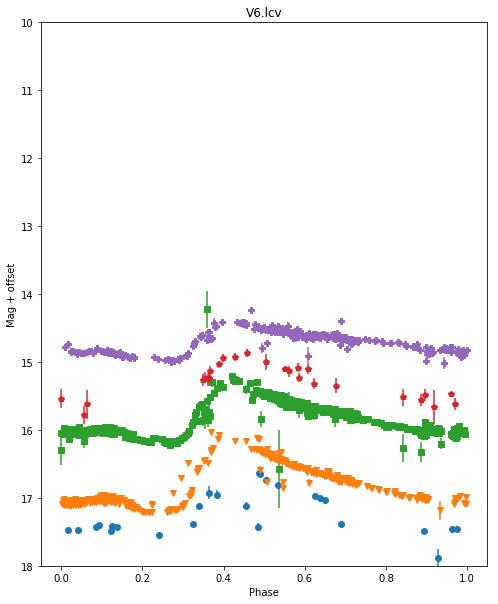

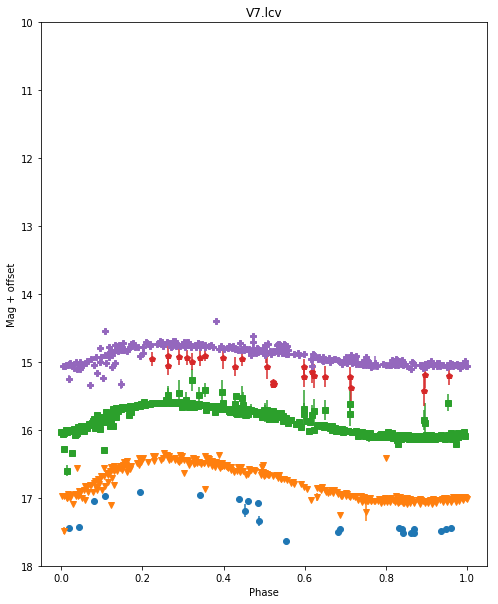

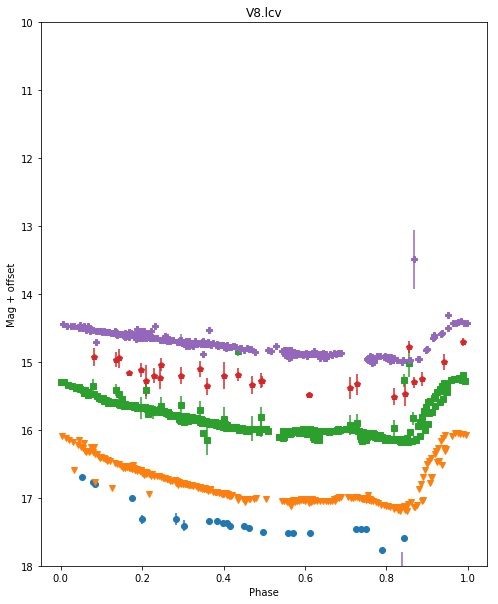

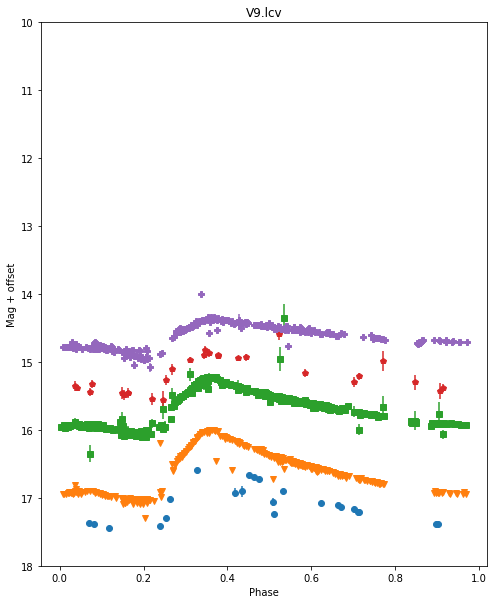

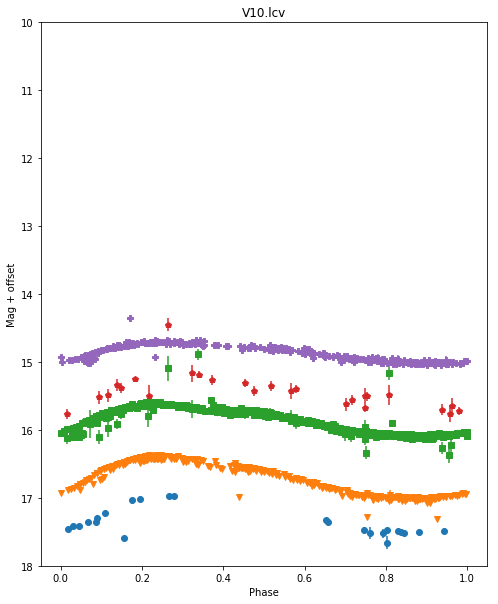

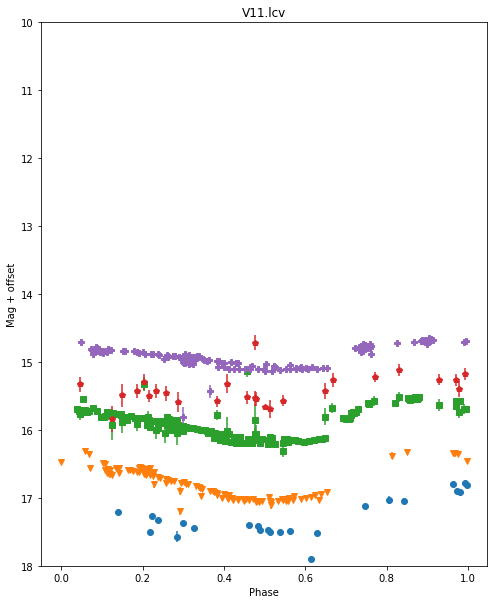

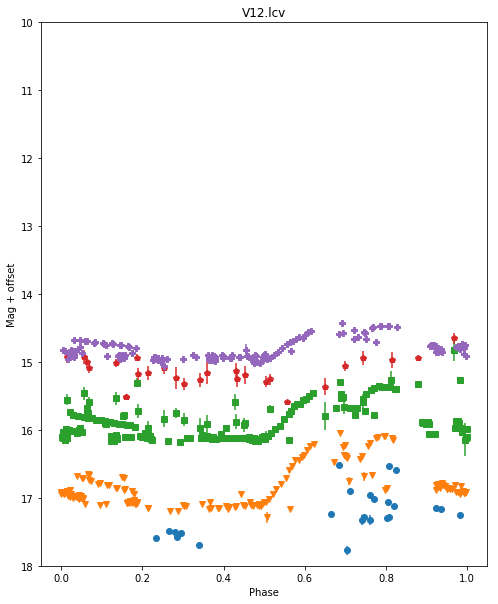

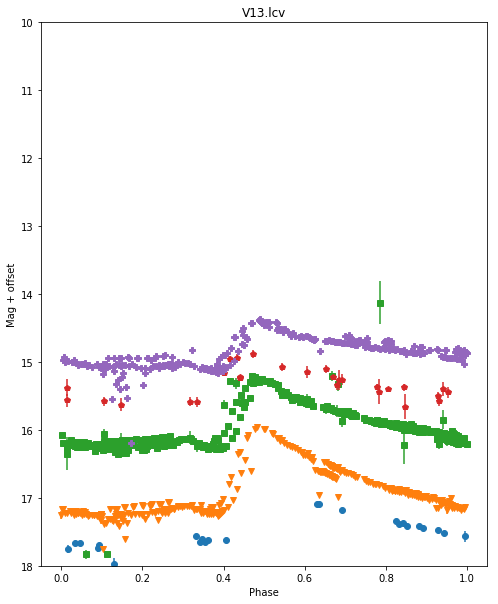

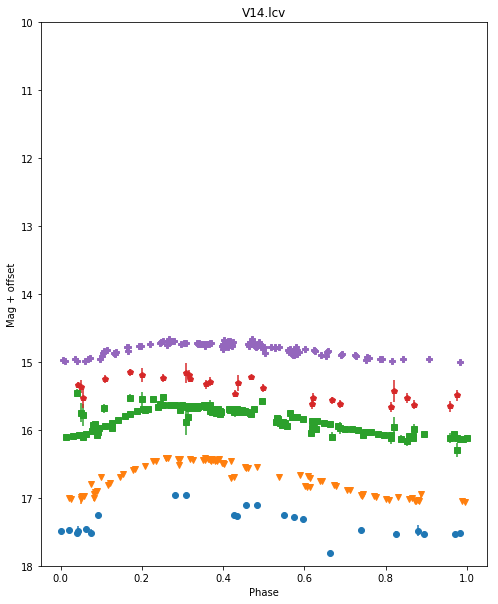

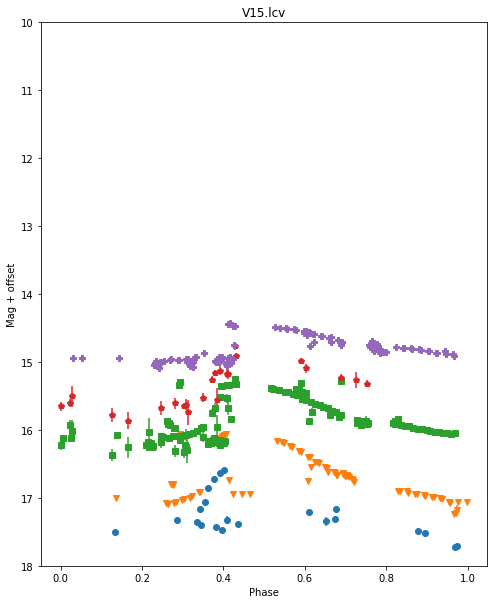

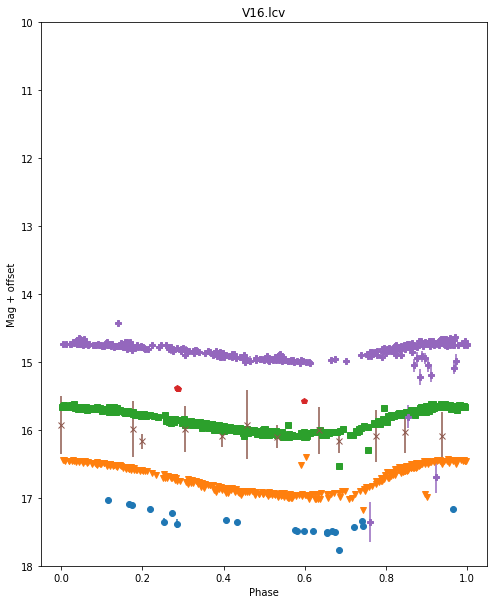

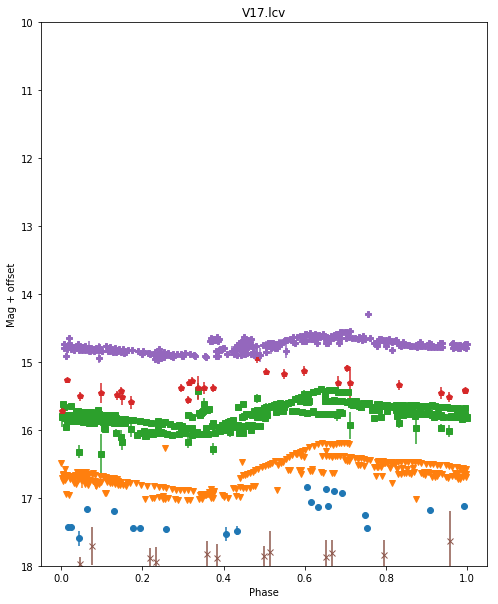

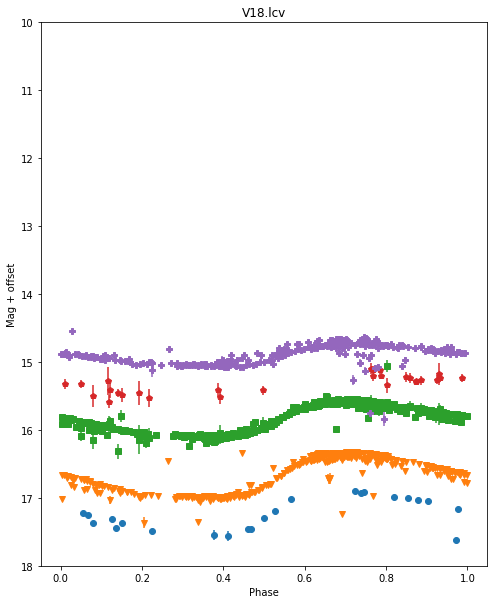

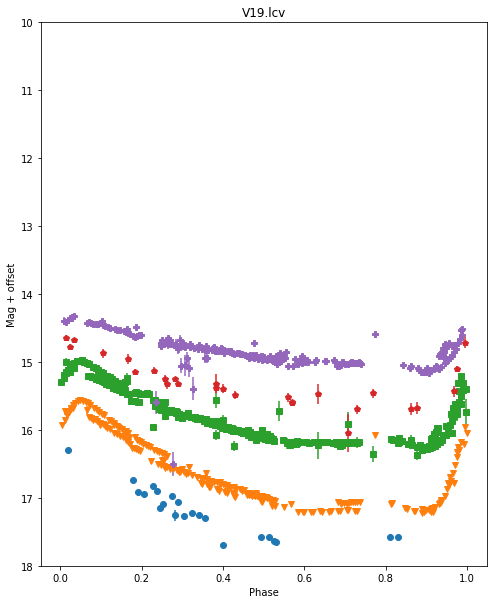

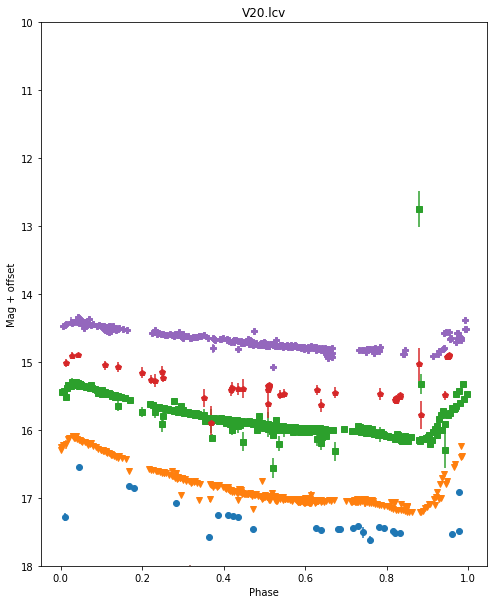

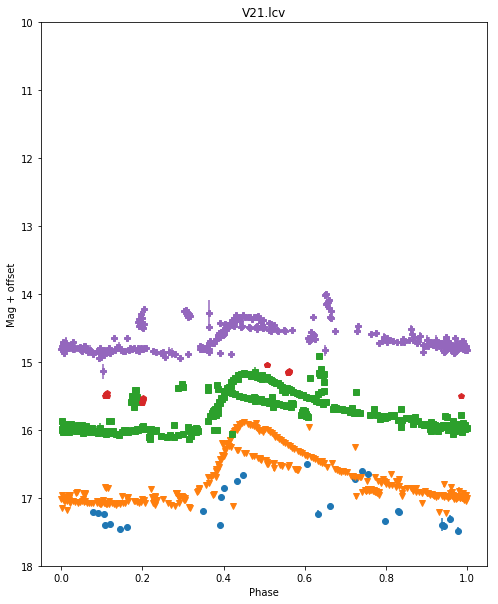

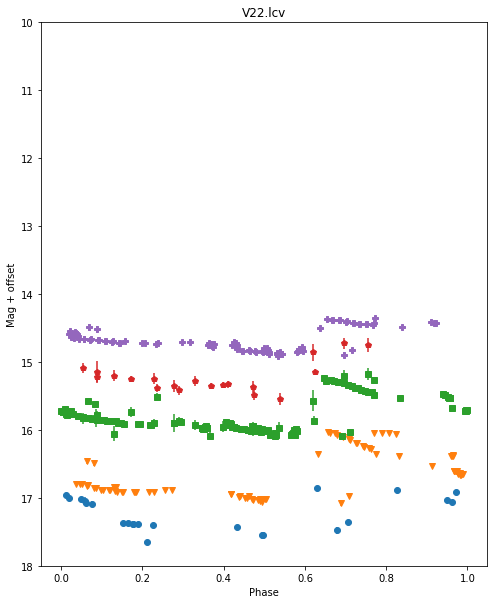

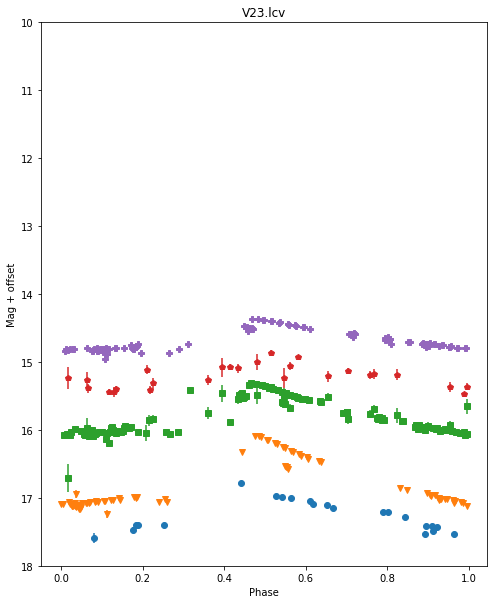

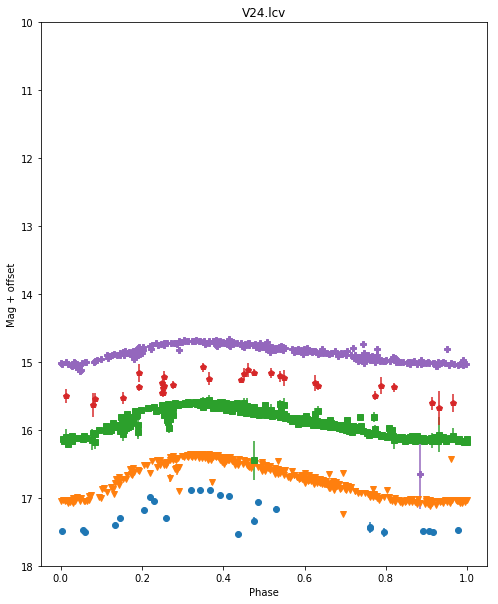

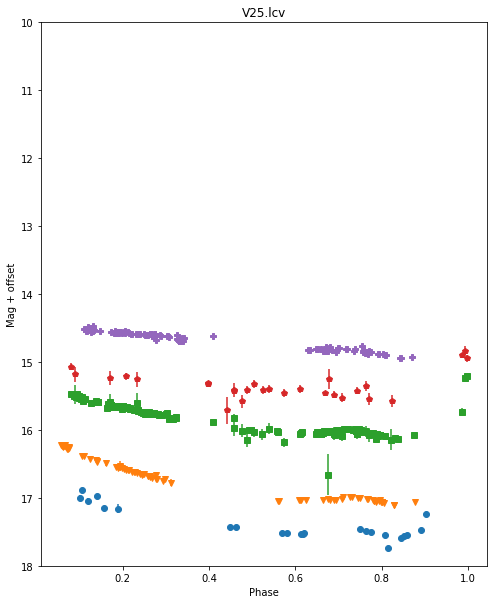

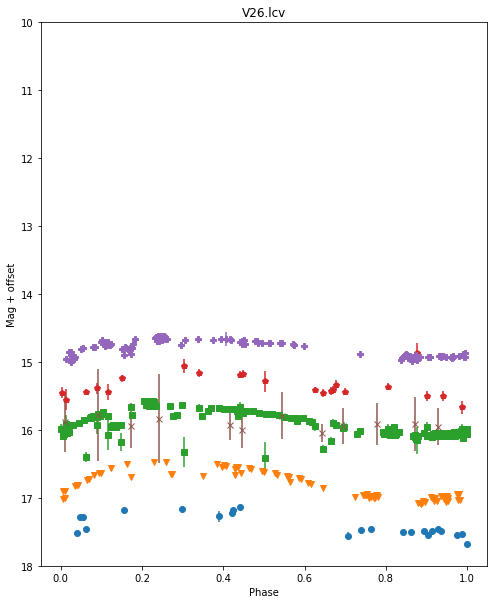

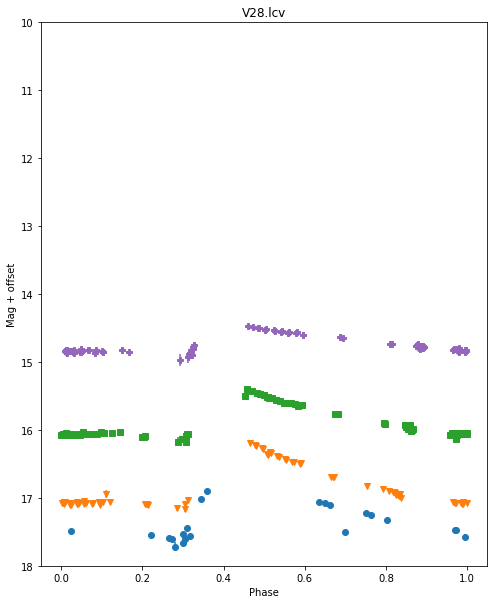

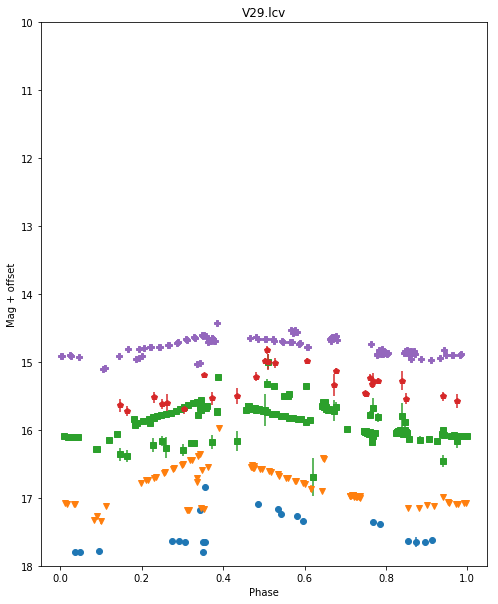

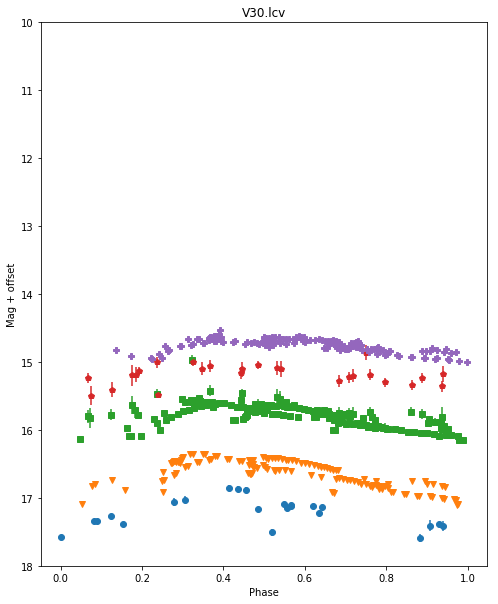

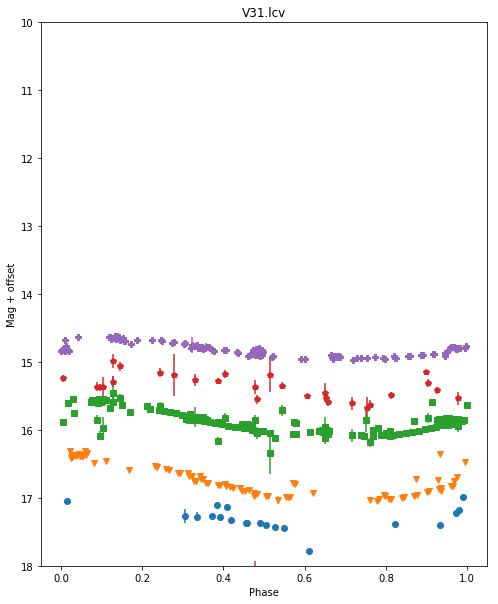

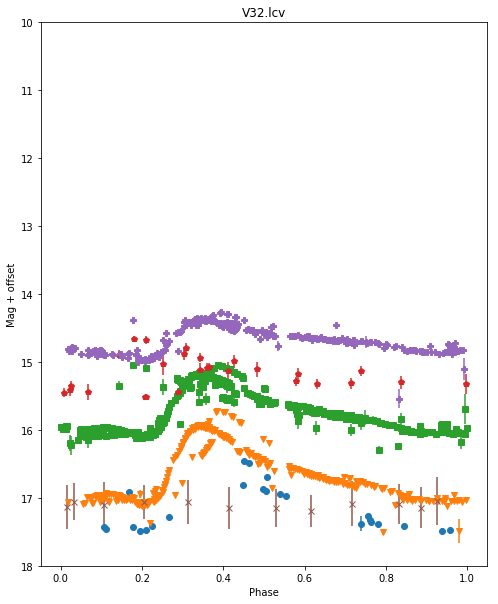

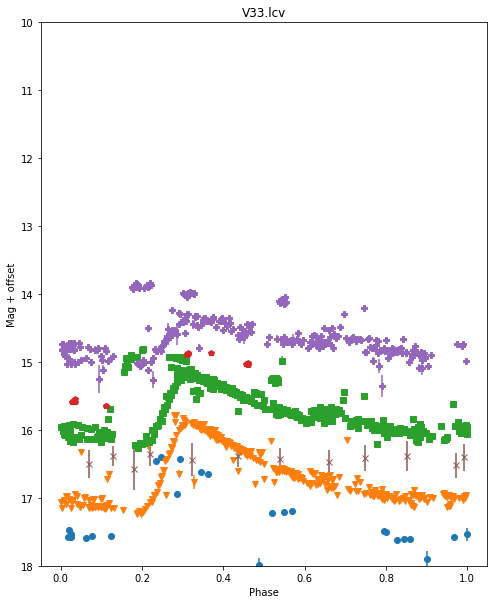

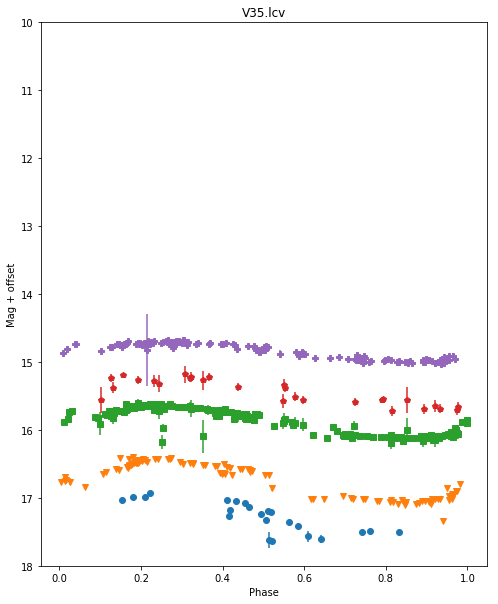

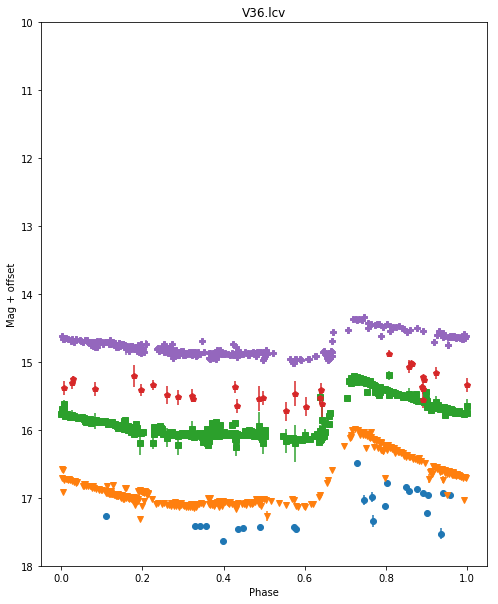

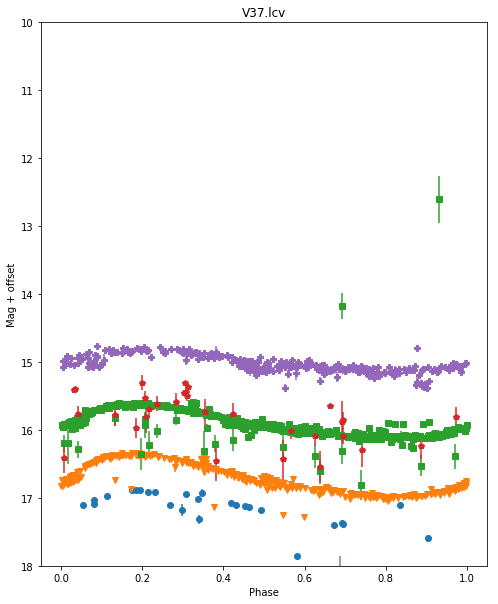

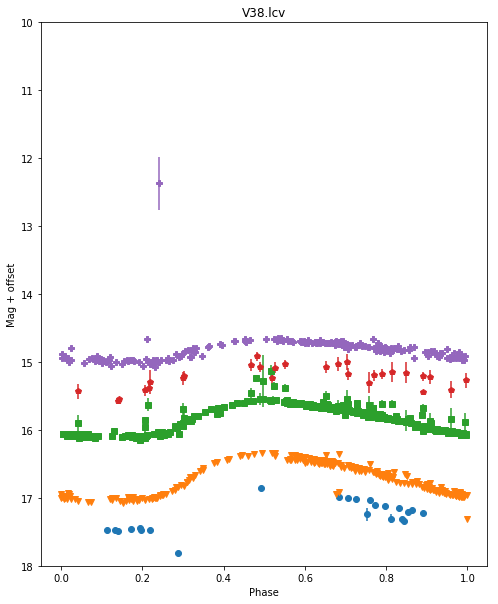

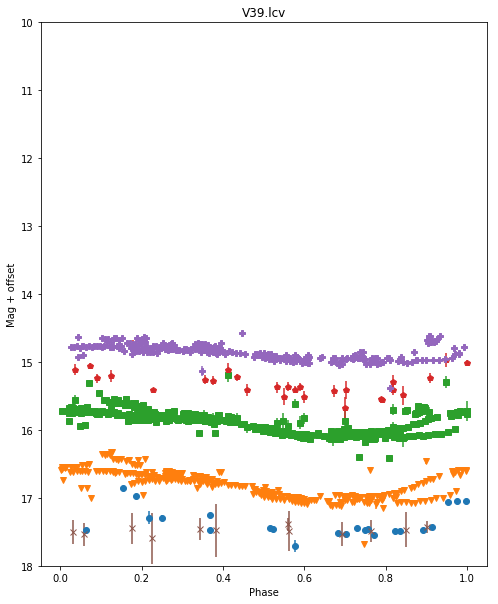

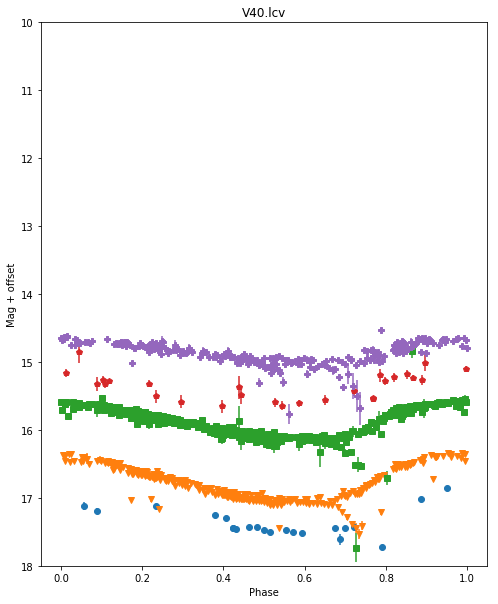

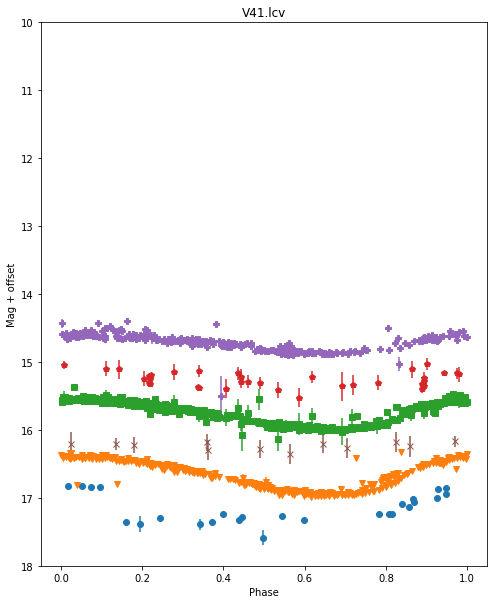

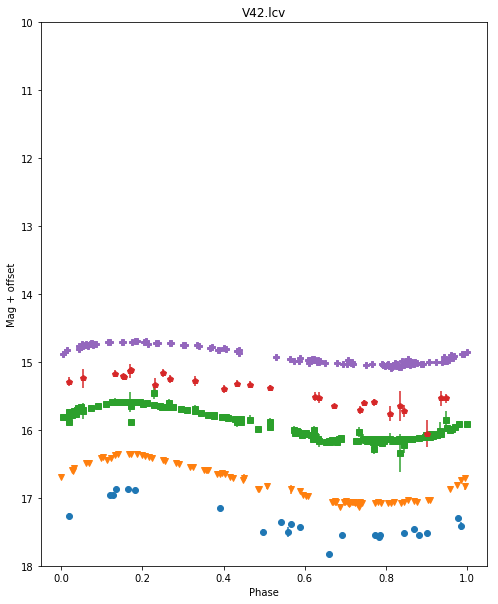

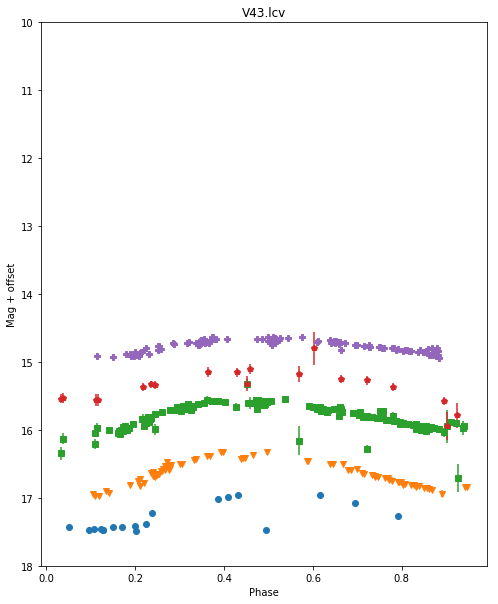

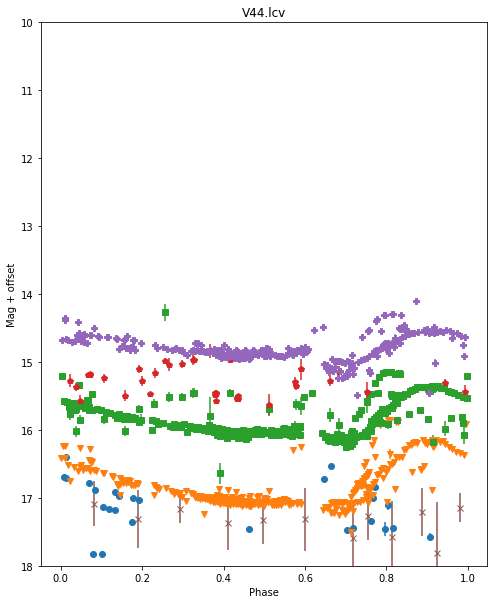

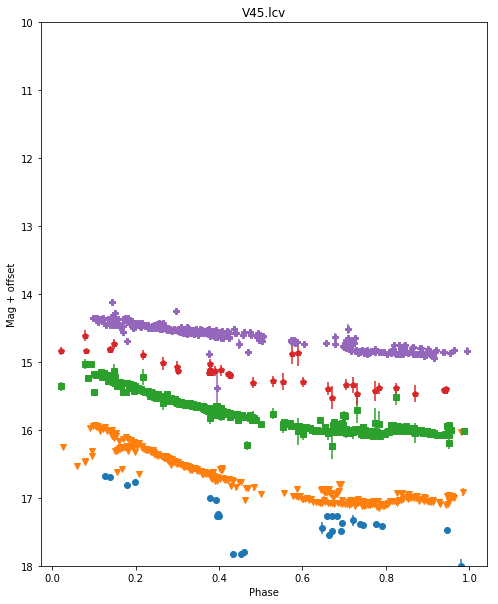

V46=  not found.


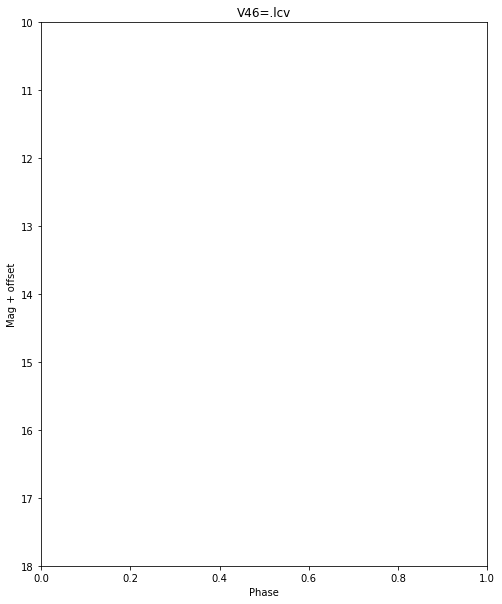

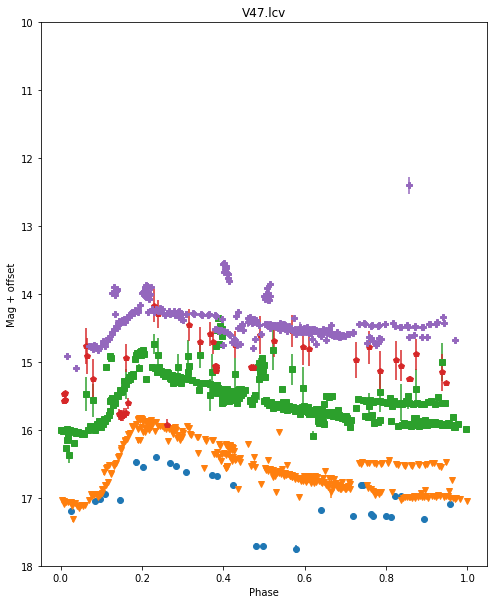

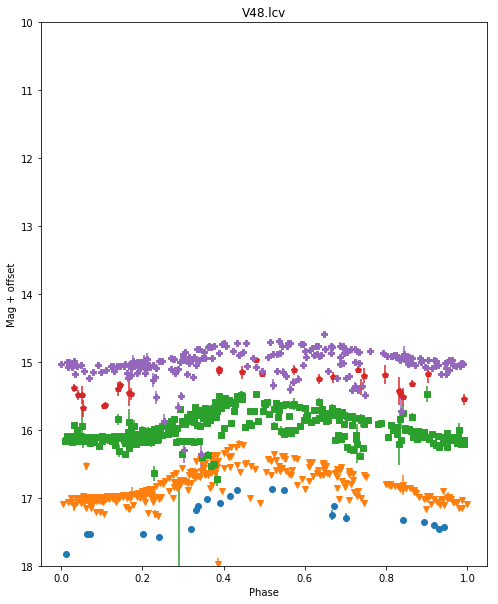

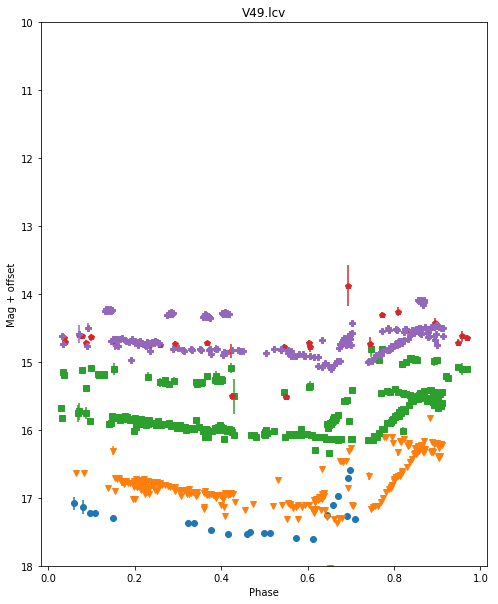

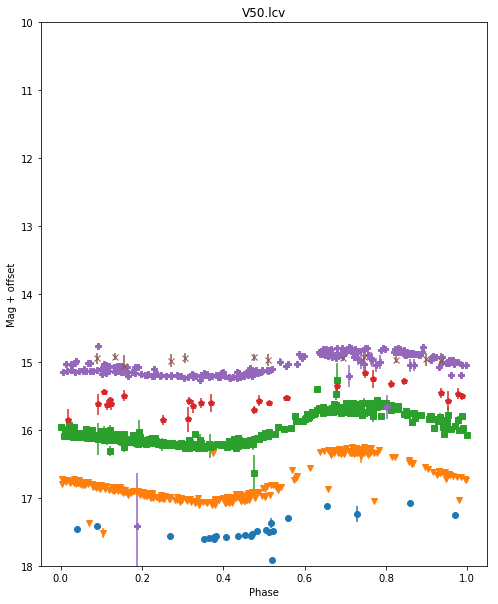

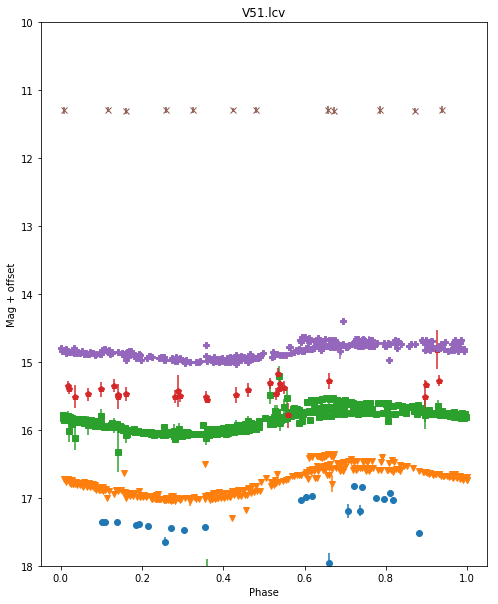

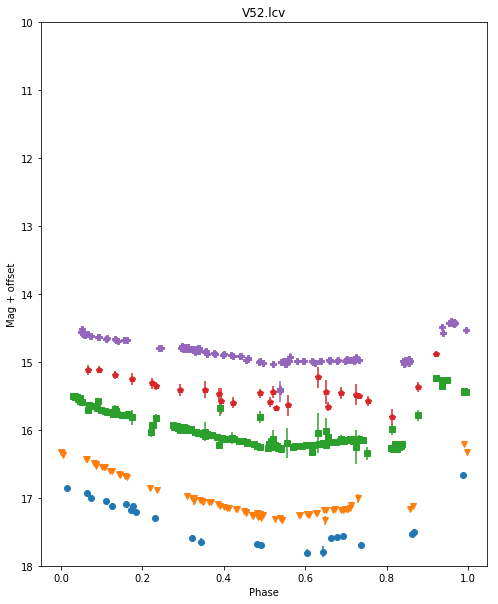

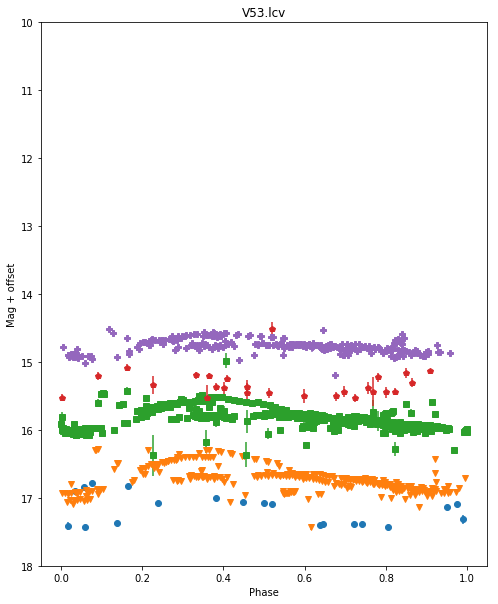

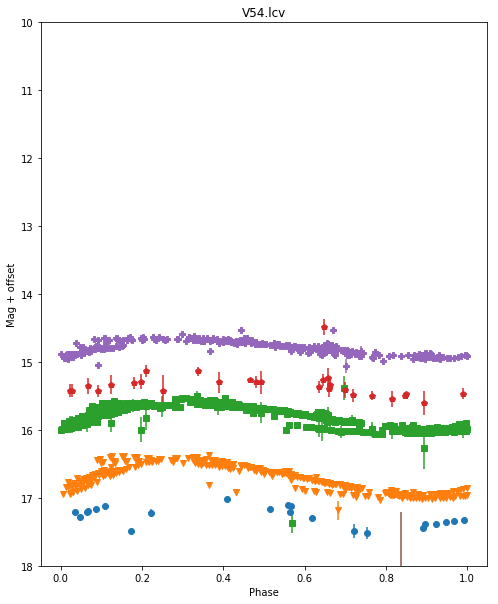

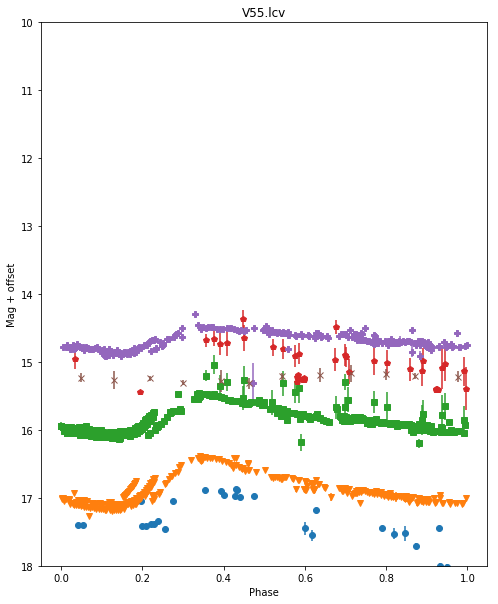

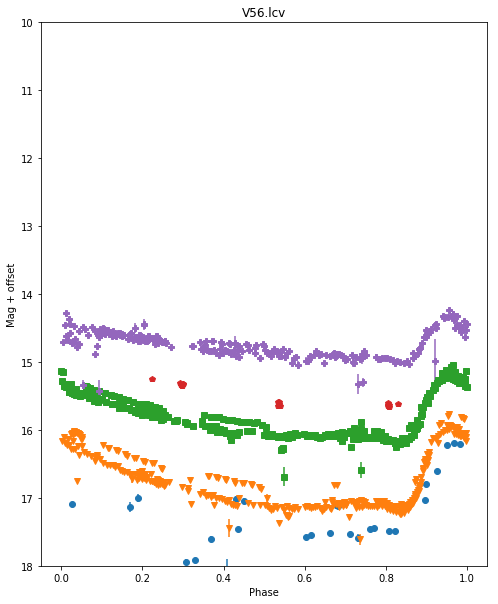

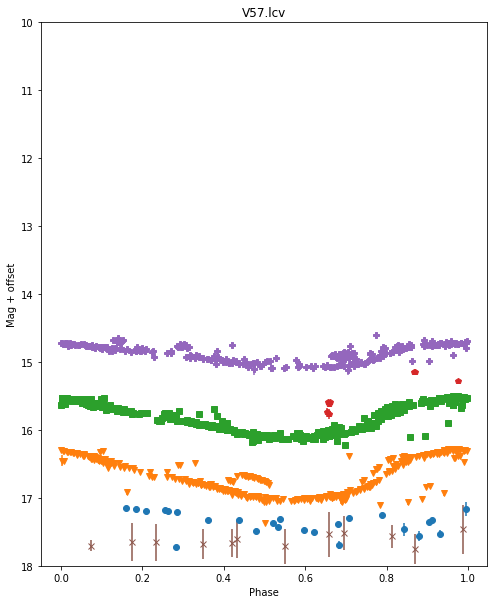

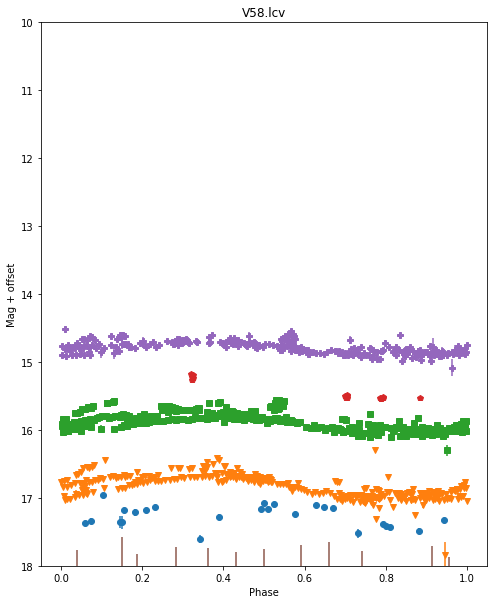

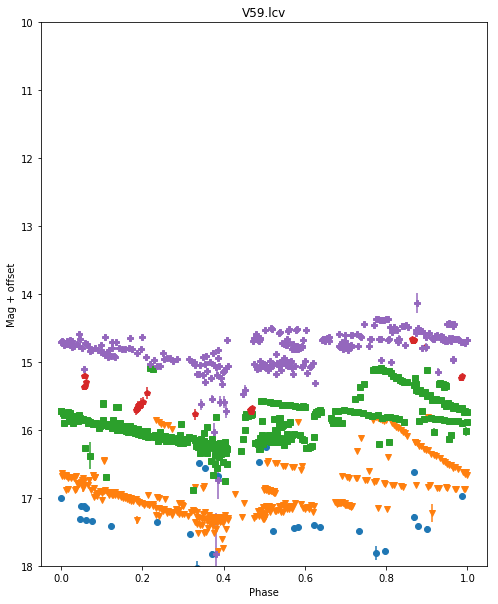

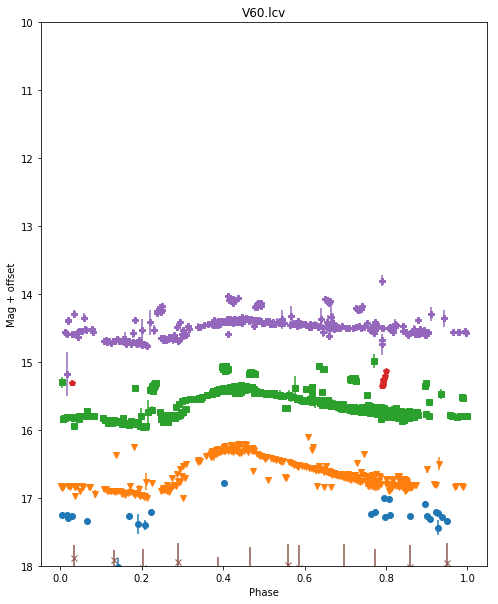

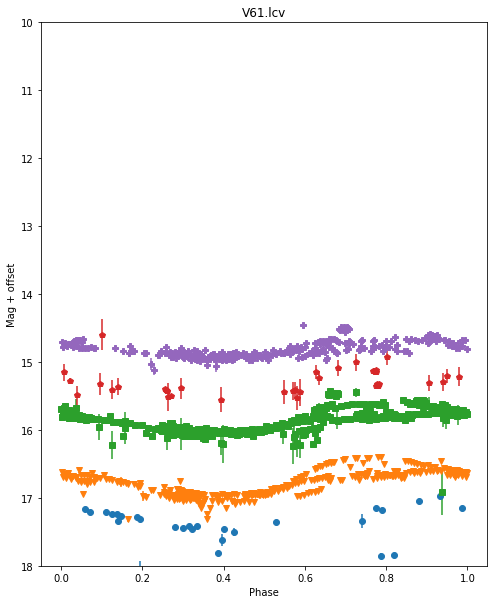

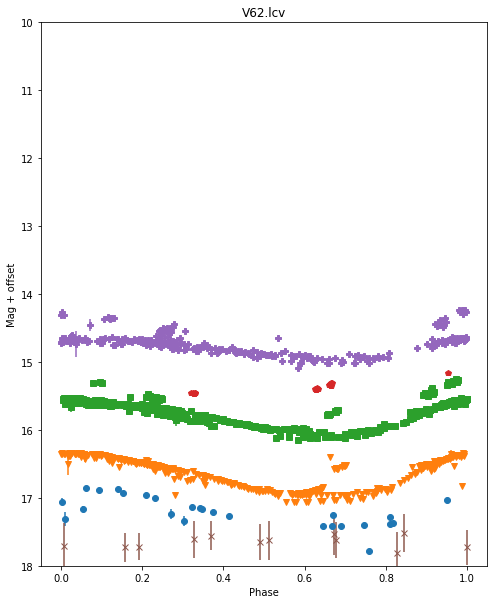

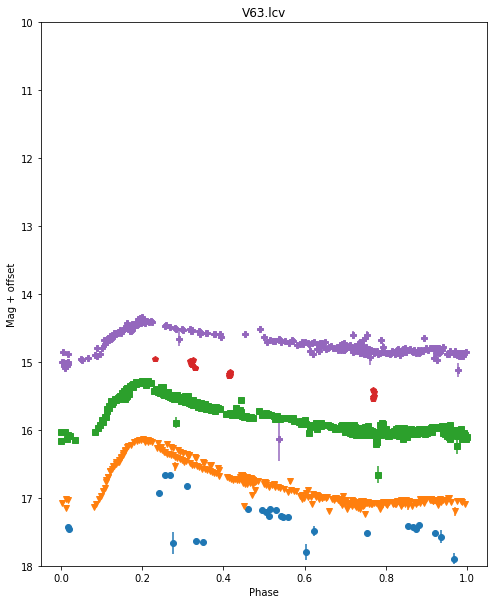

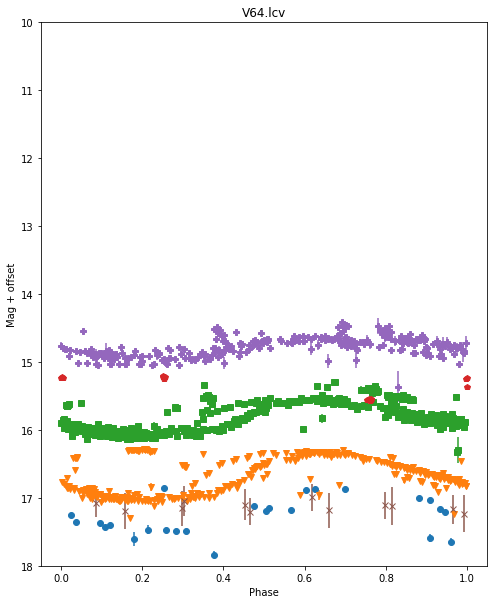

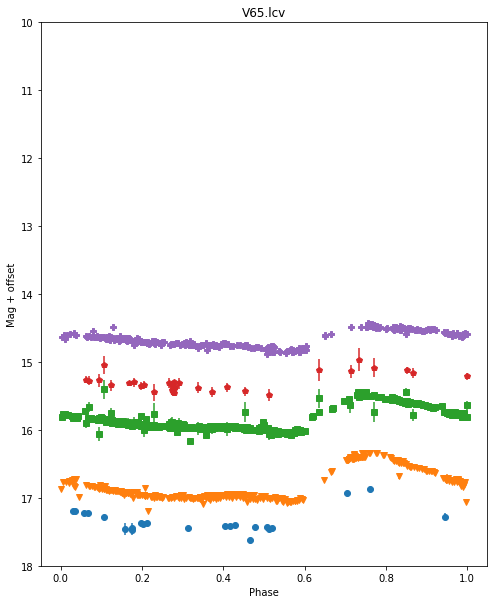

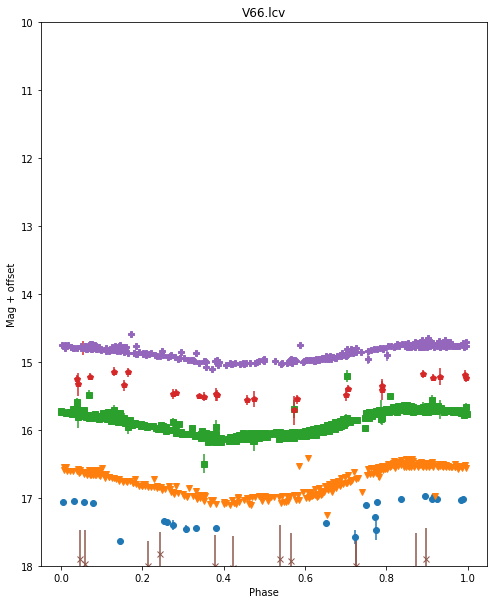

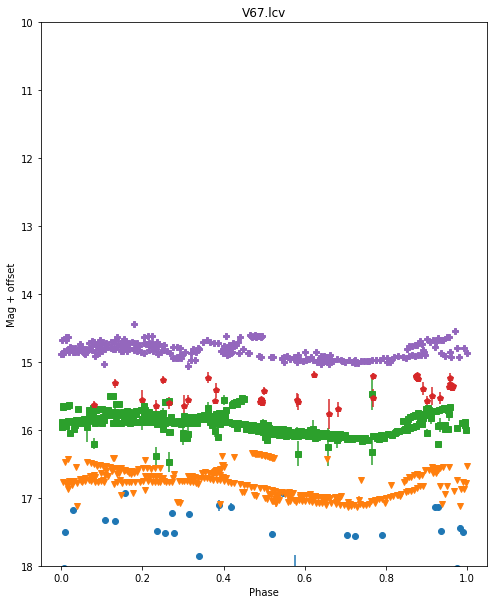

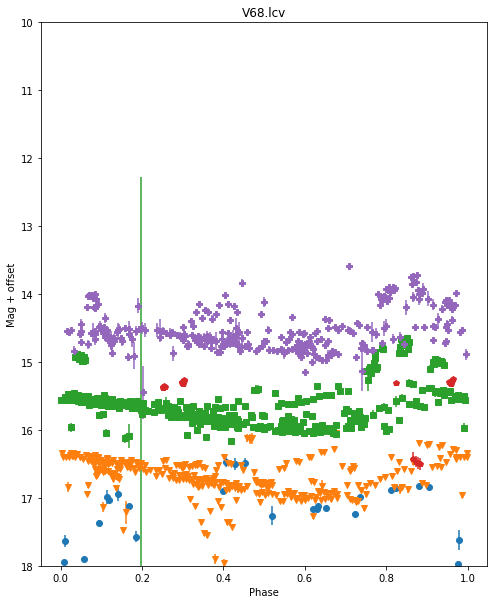

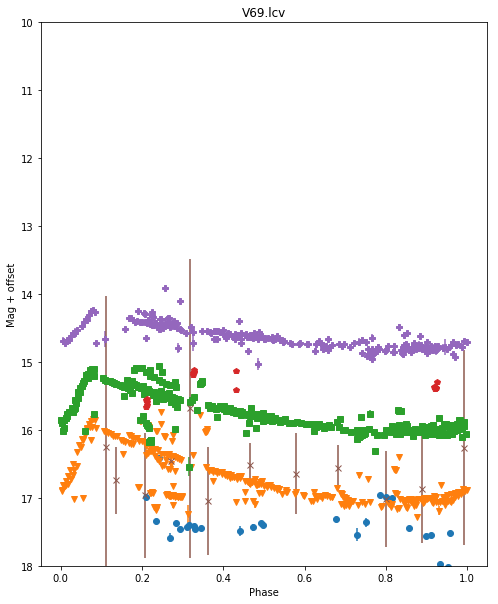

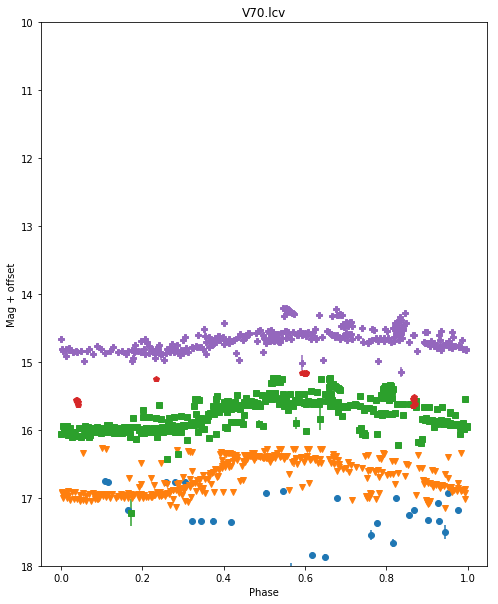

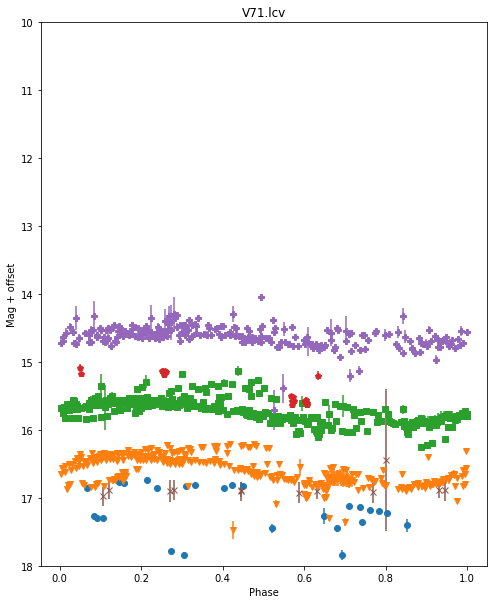

V73=  not found.


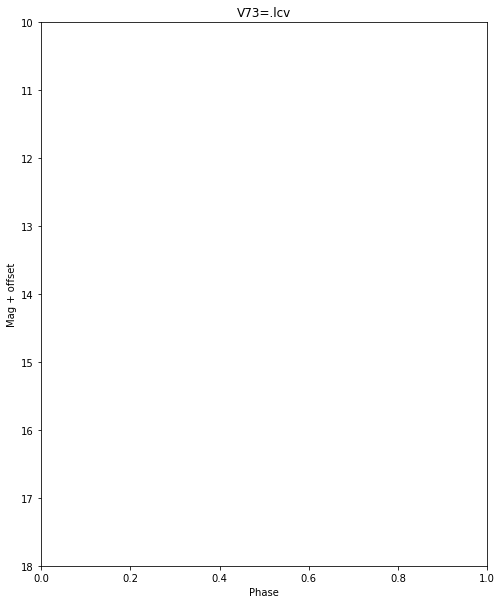

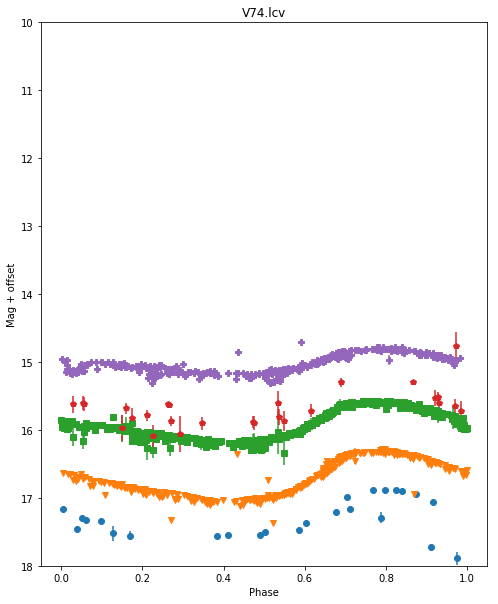

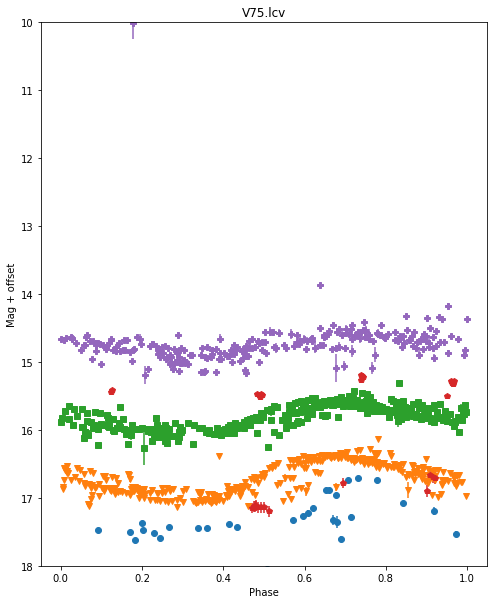

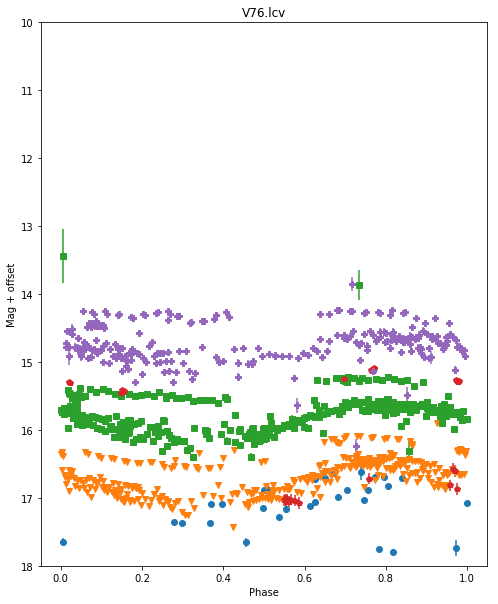

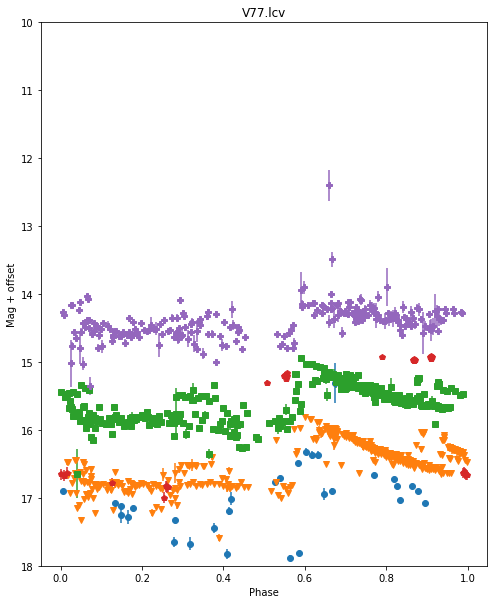

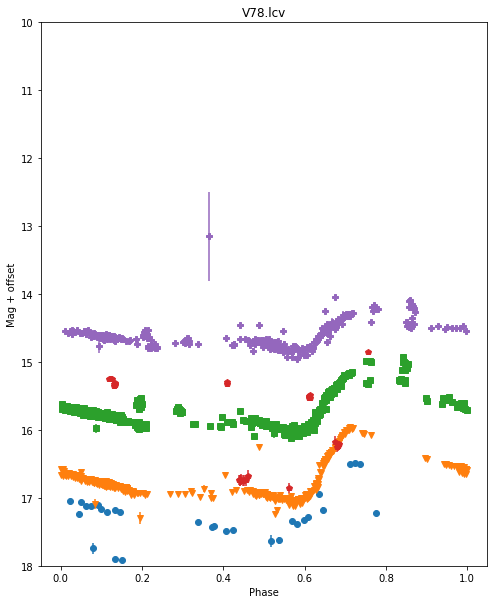

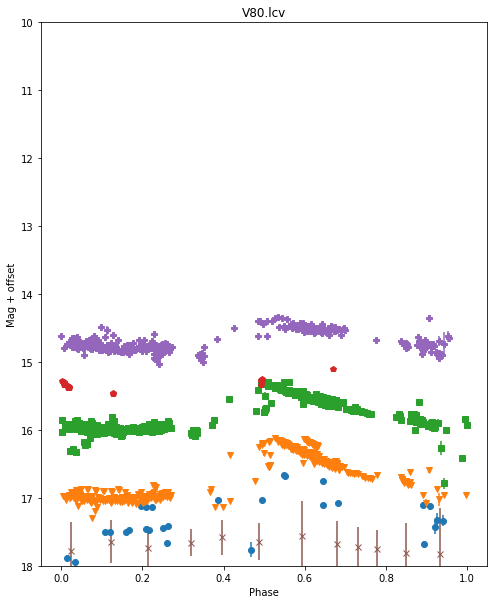

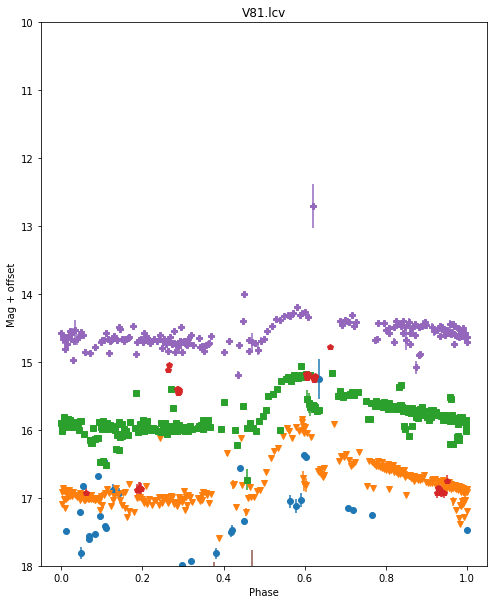

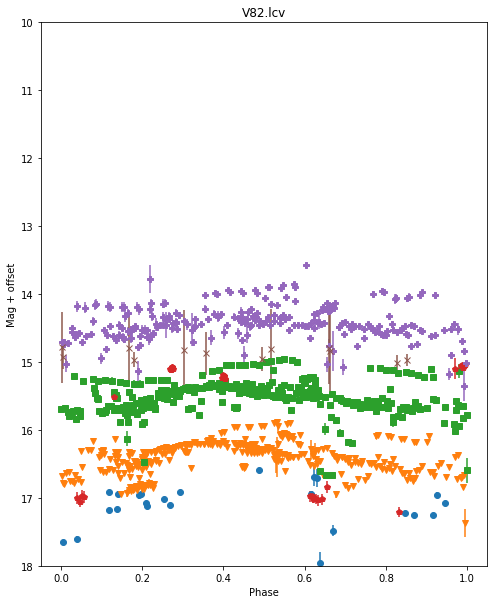

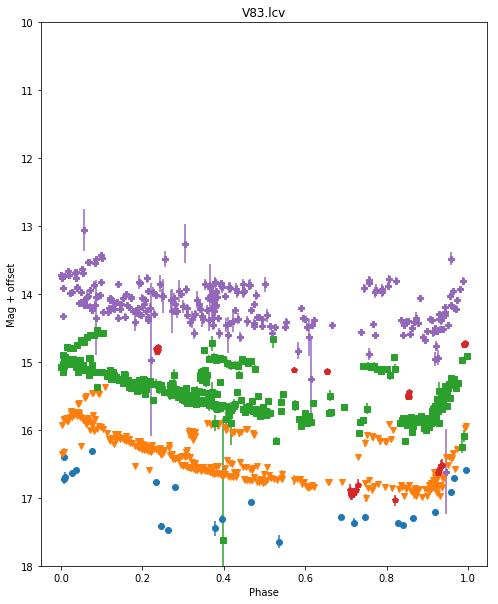

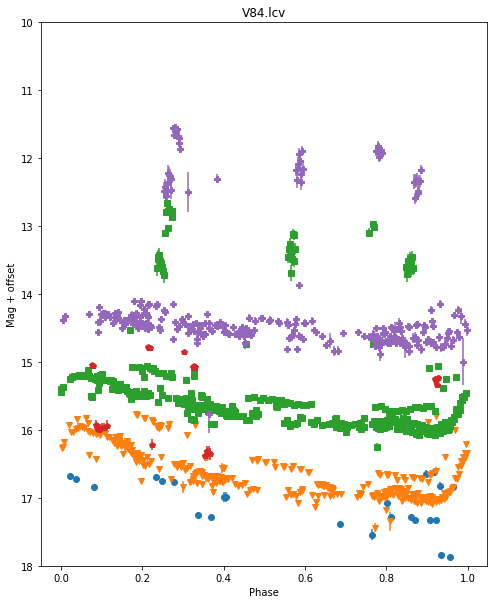

V87=  not found.


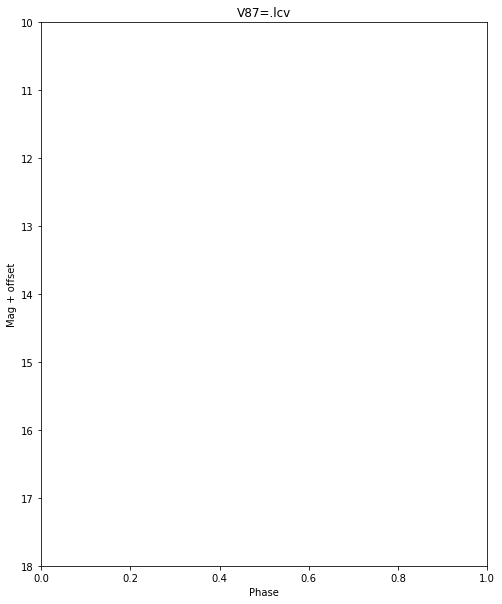

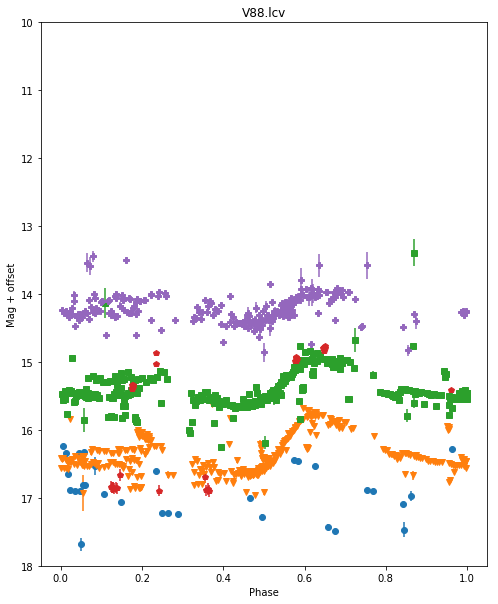

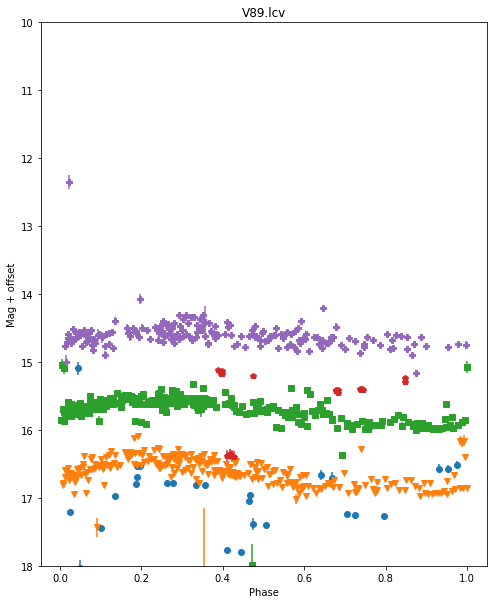

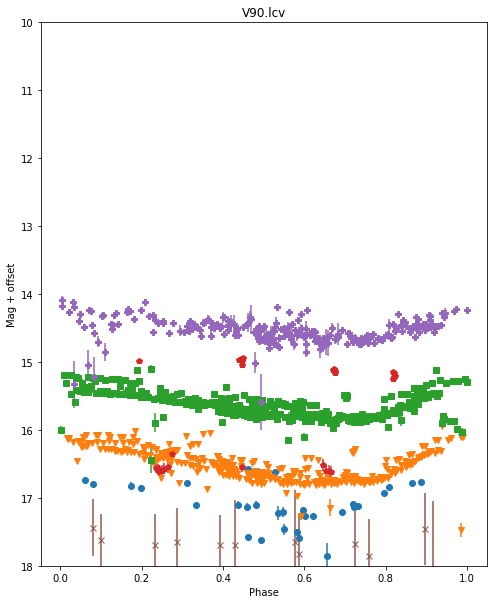

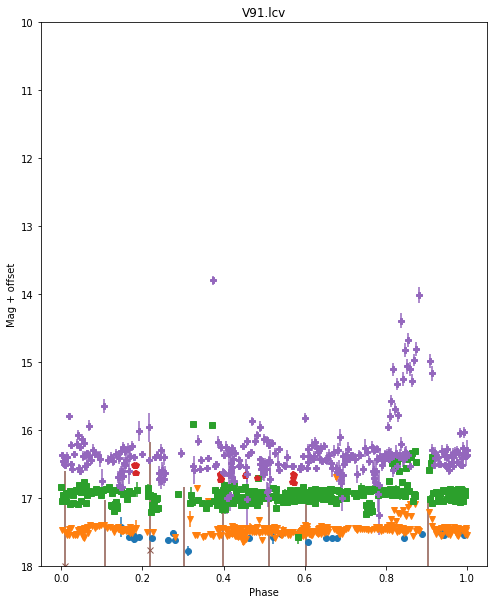

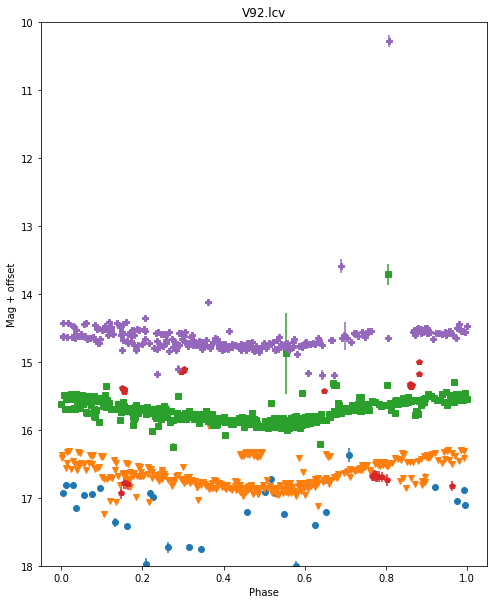

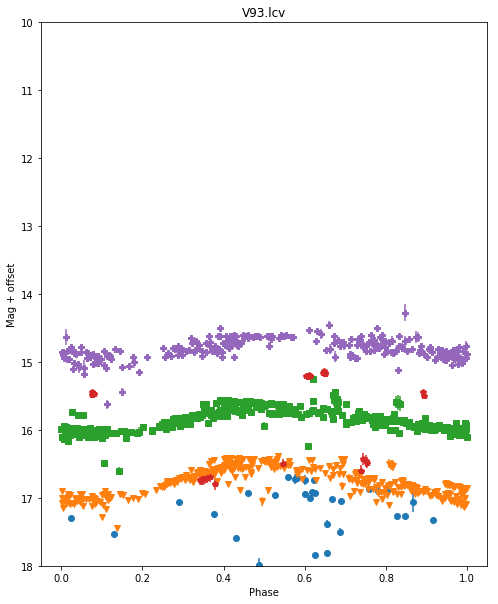

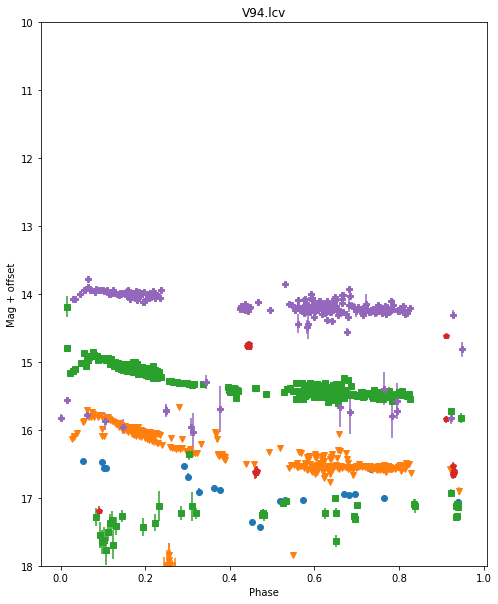

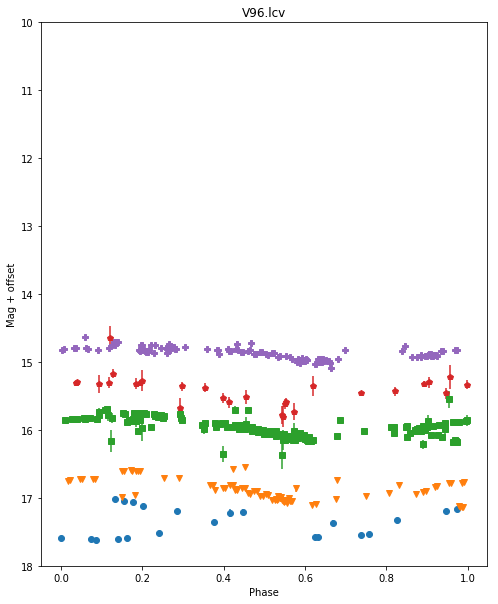

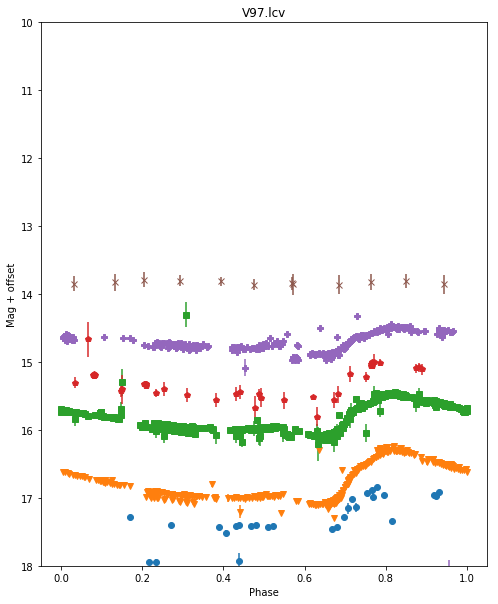

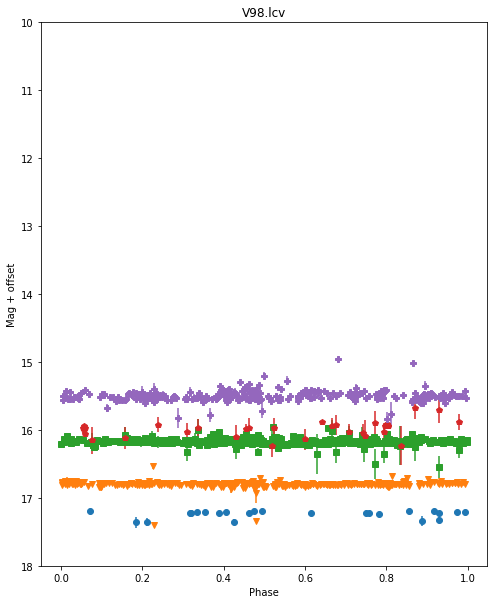

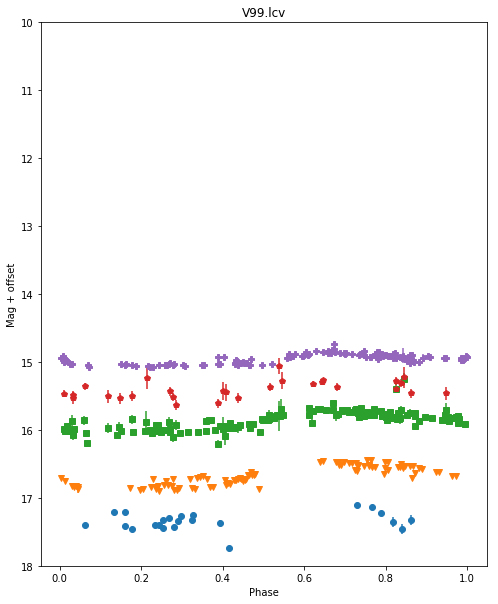

V100  not found.


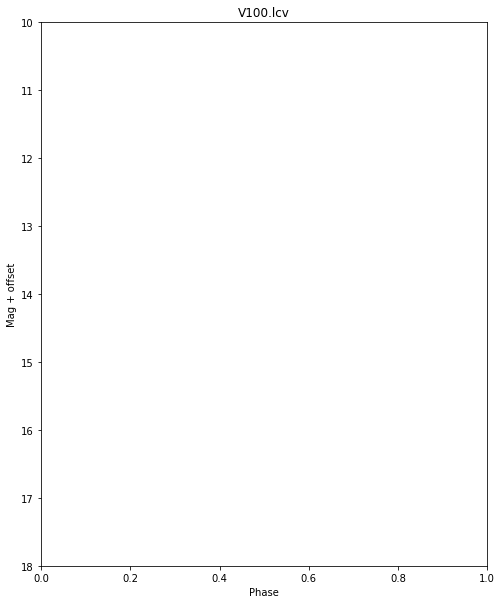

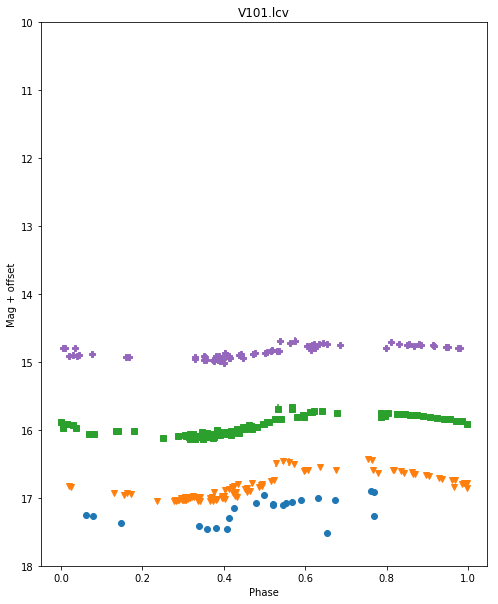

V102  not found.


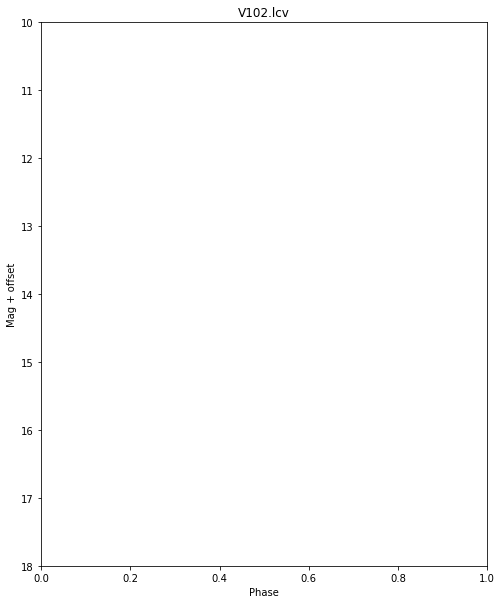

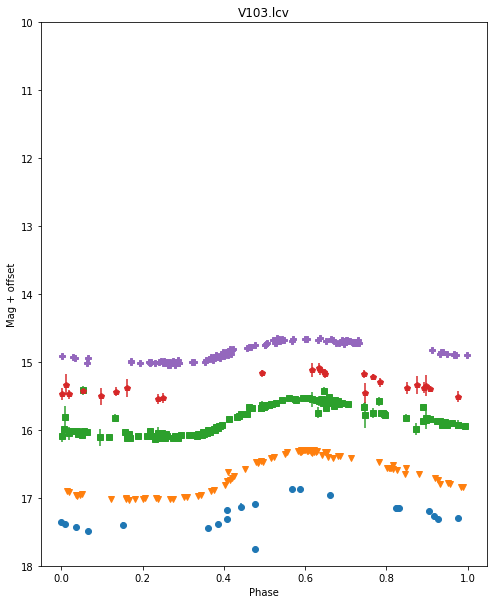

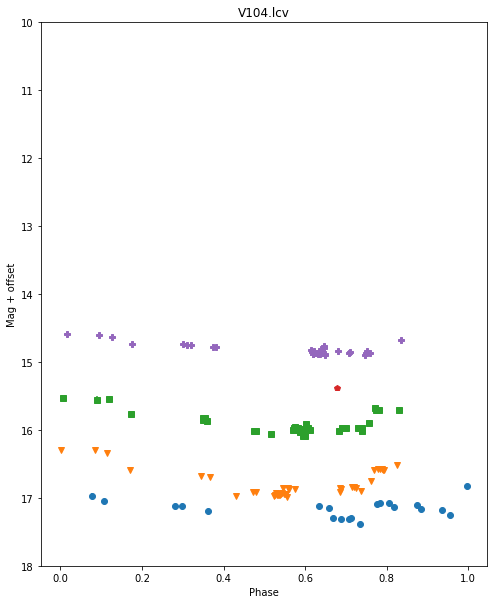

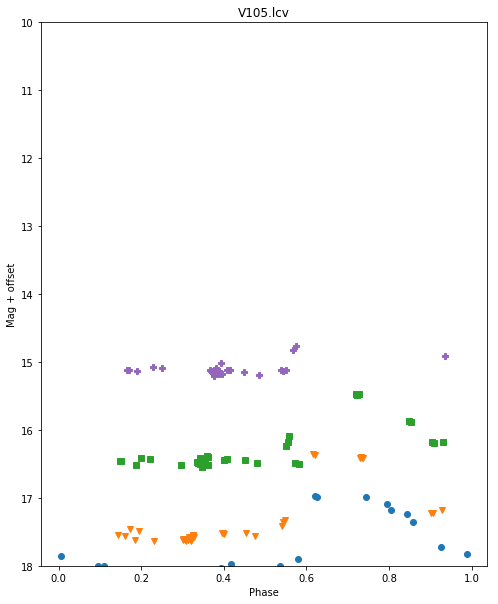

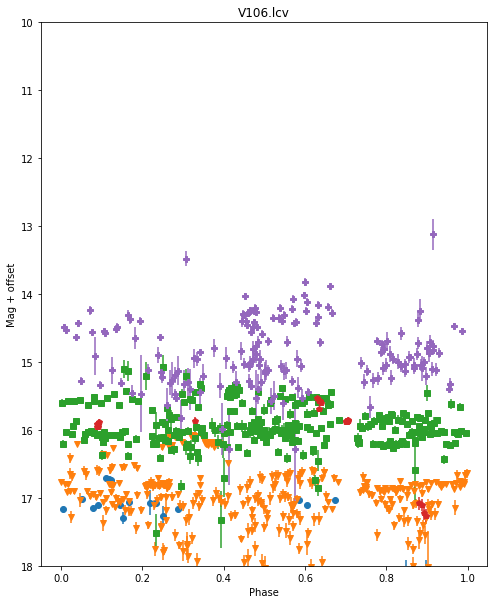

V107  not found.


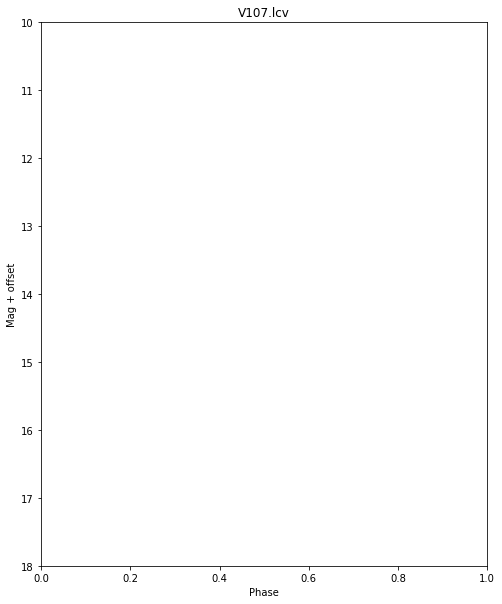

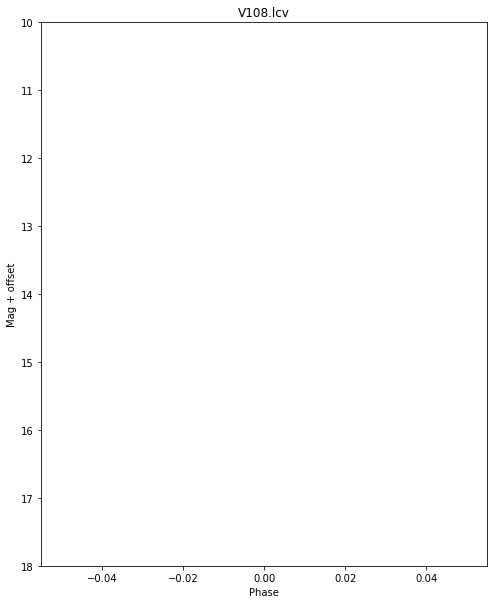

V109  not found.


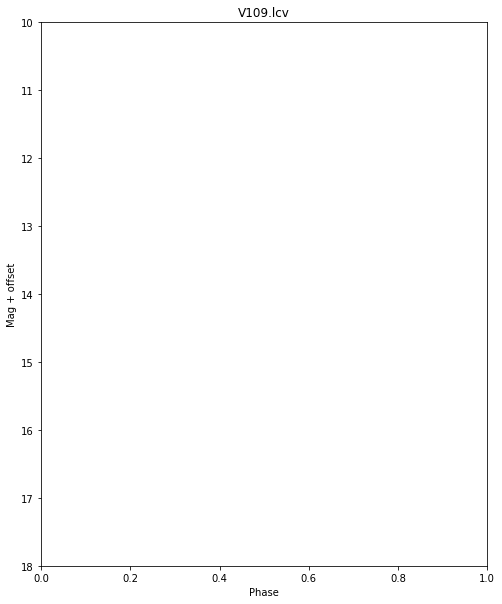

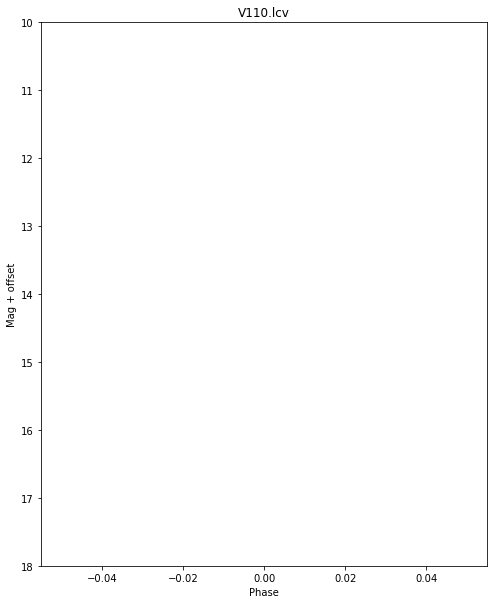

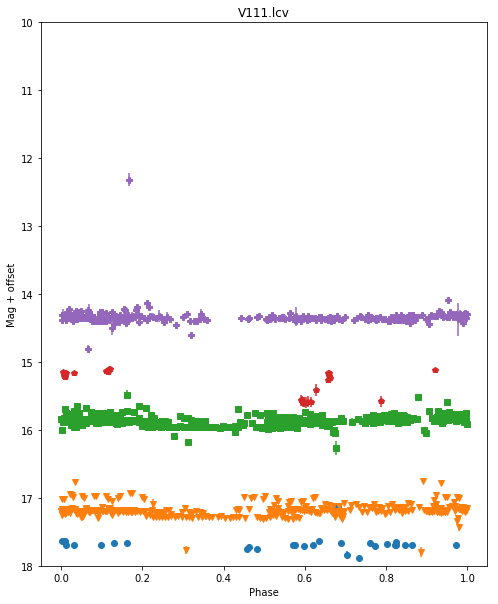

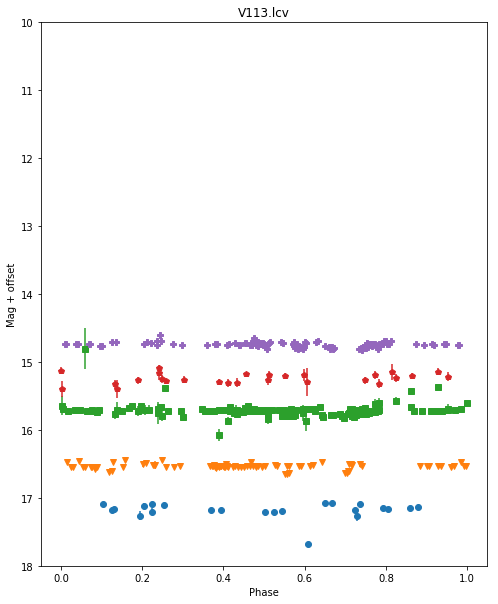

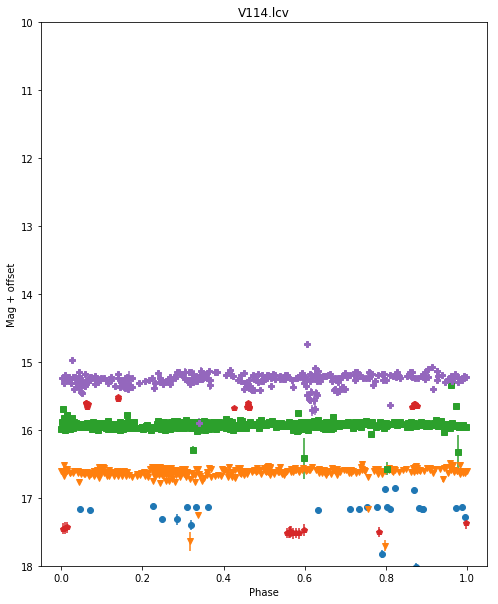

V116  not found.


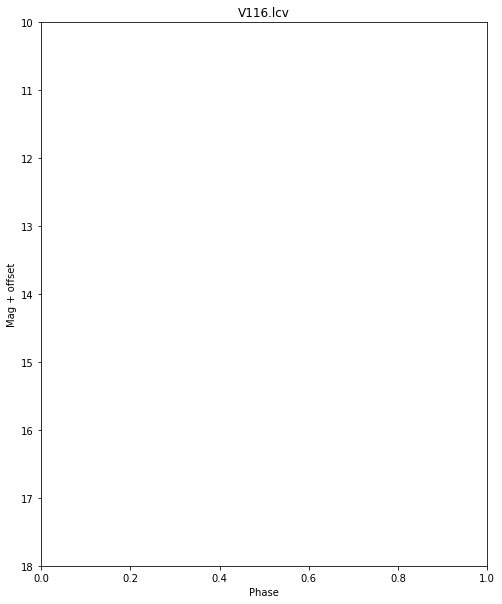

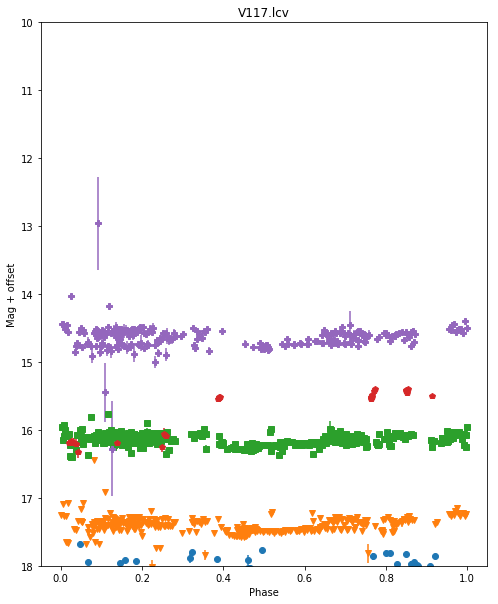

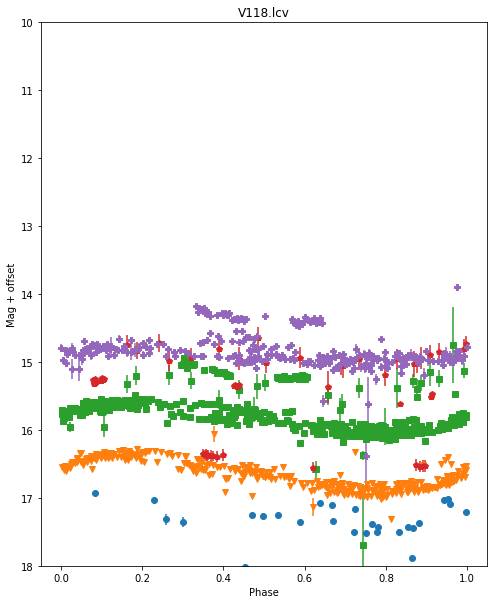

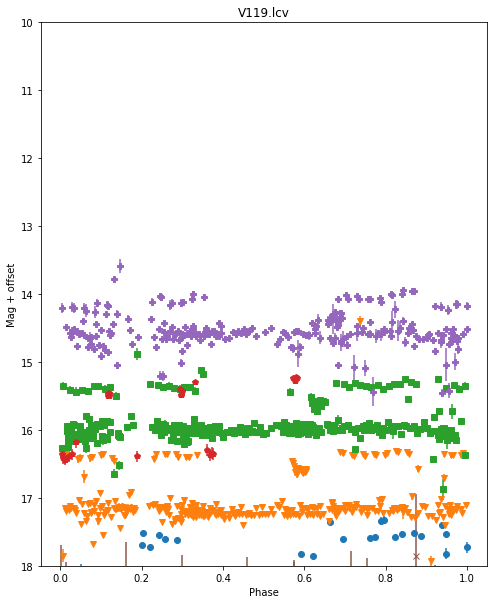

V120  not found.


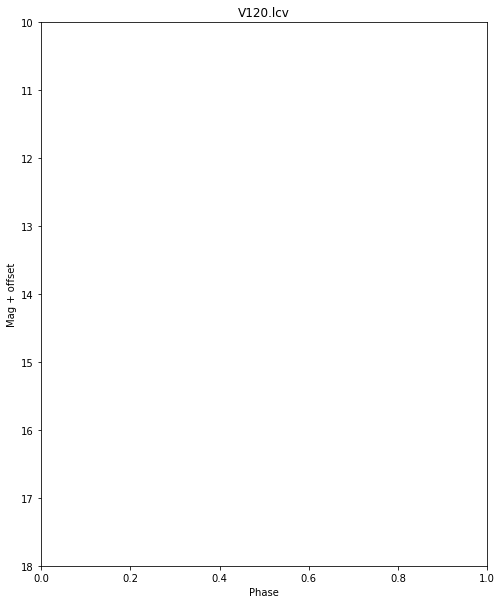

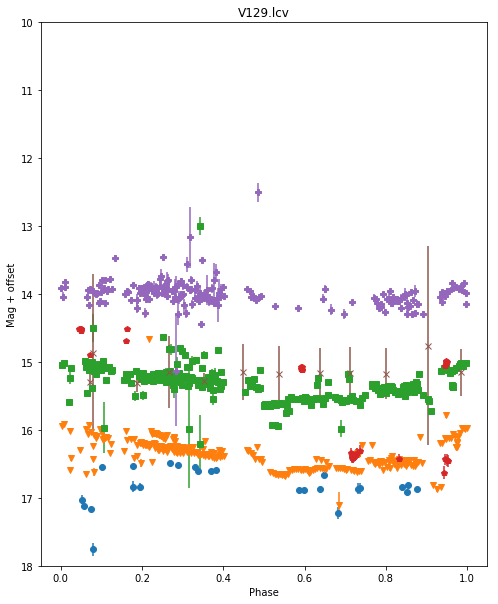

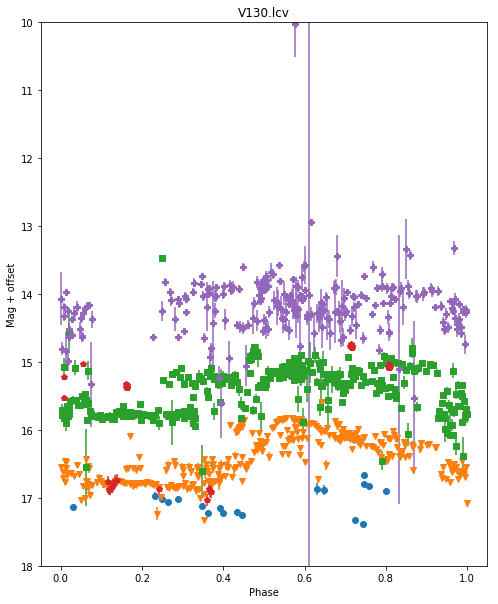

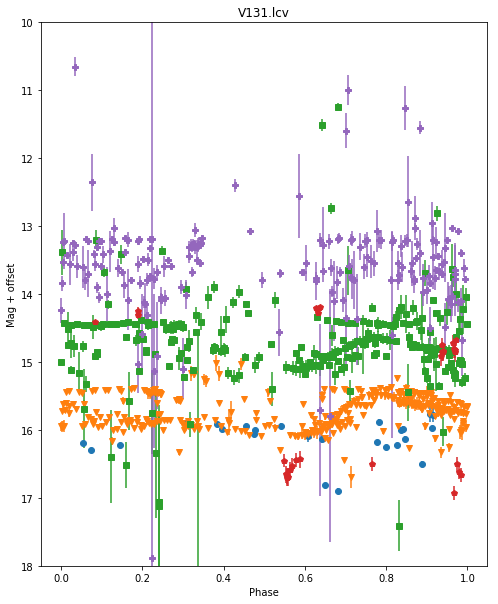

V132  not found.


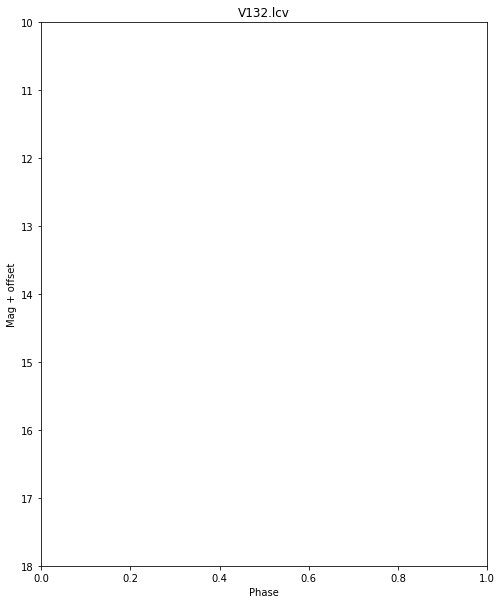

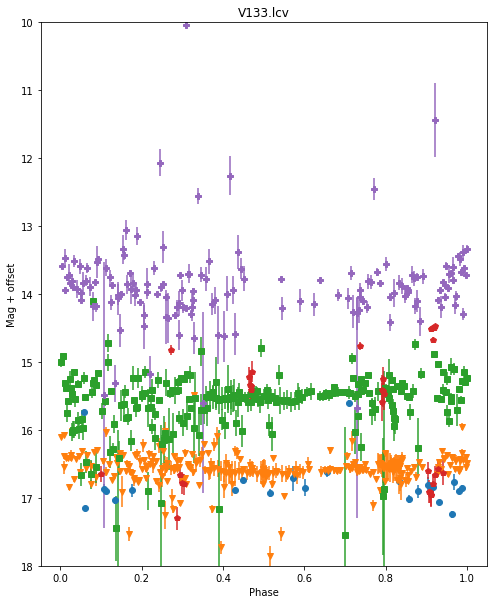

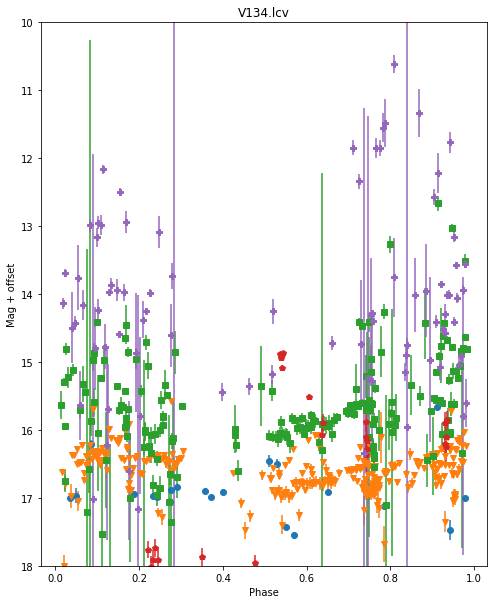

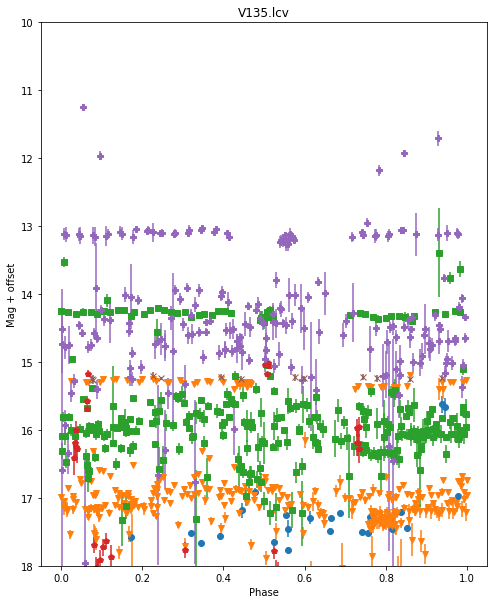

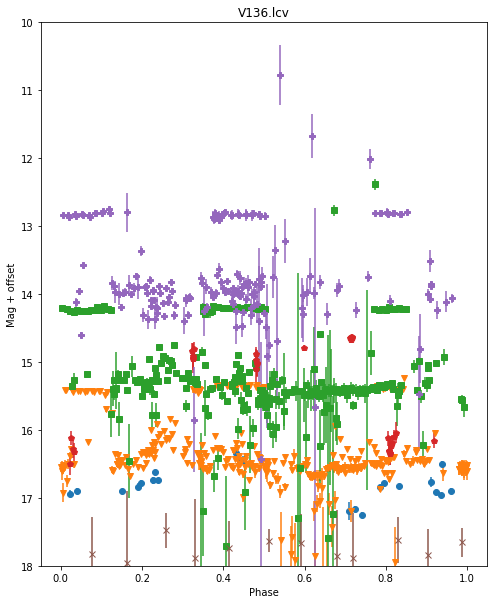

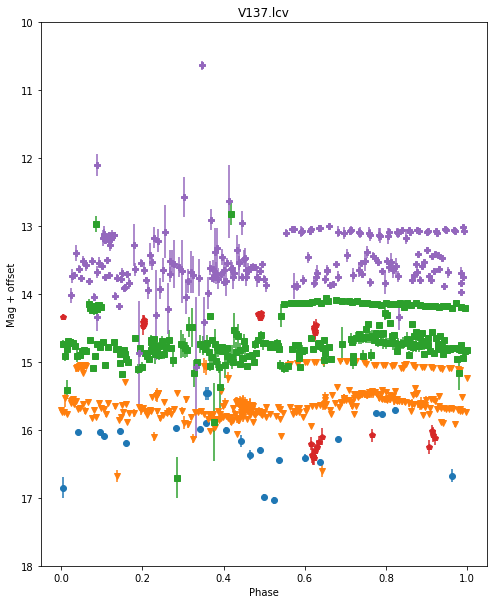

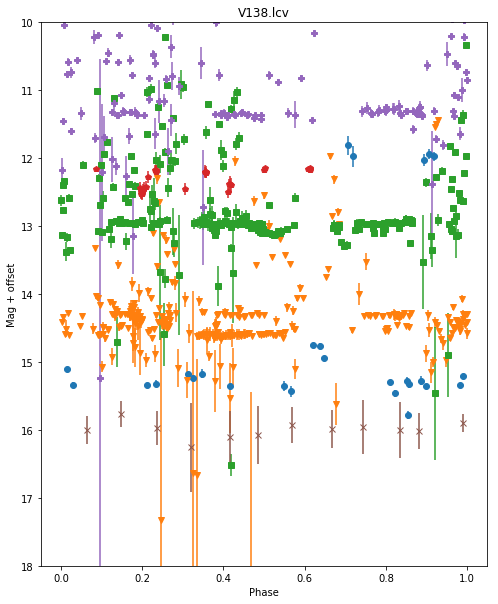

V139  not found.


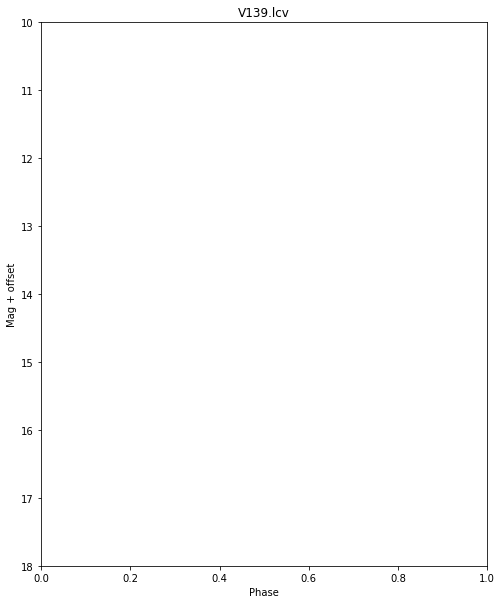

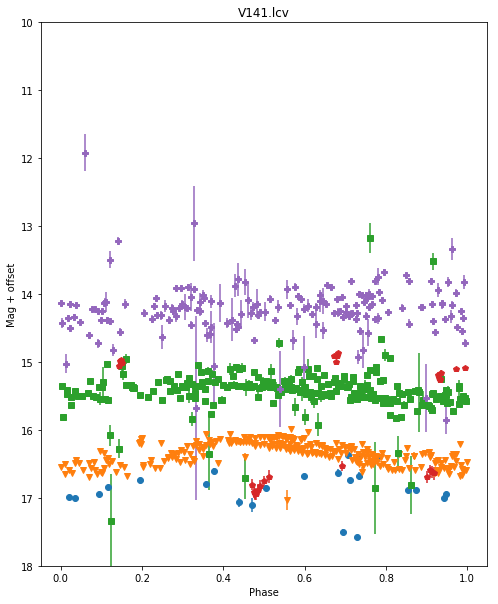

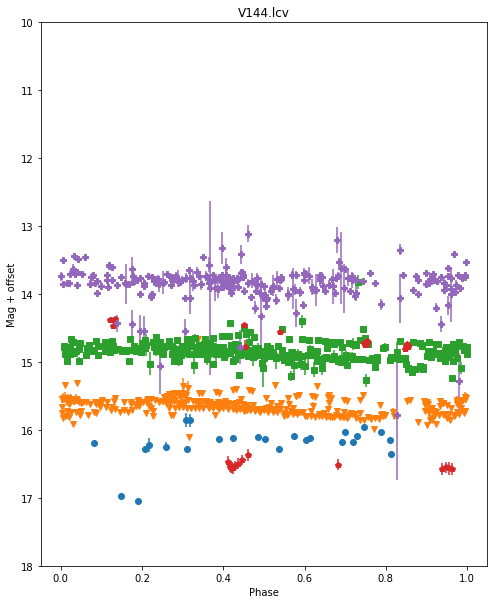

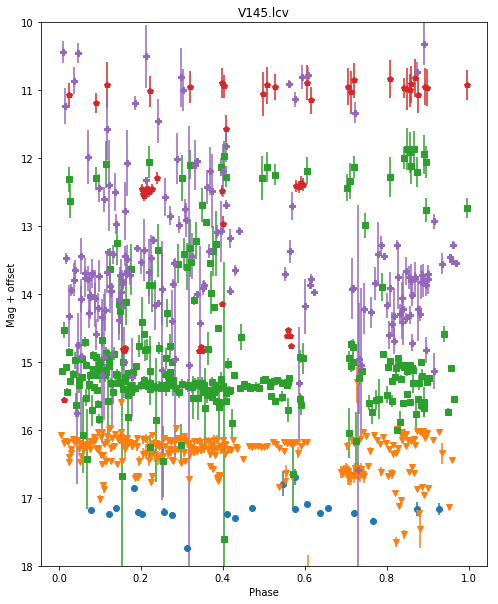

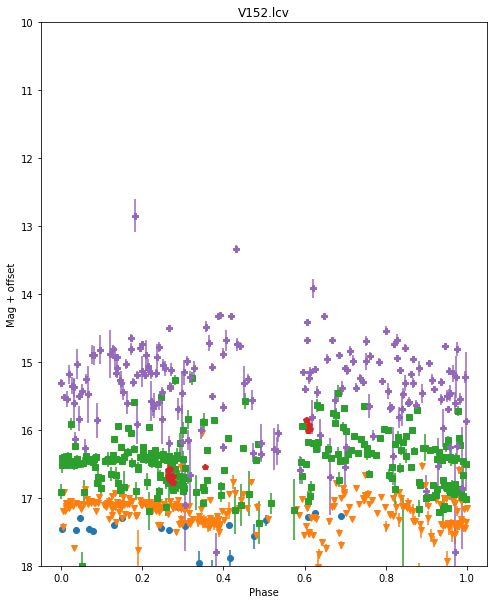

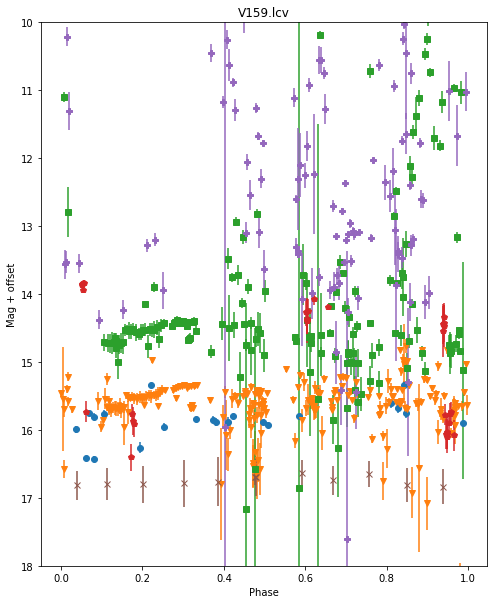

V160  not found.
V161  not found.
V162  not found.
V115  not found.
V164  not found.
V165  not found.
V166  not found.


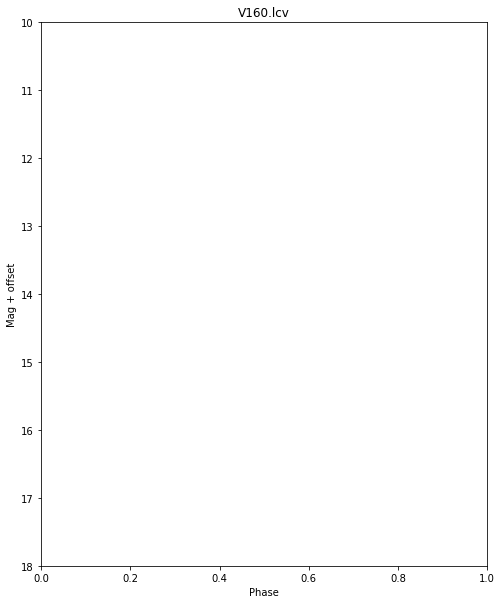

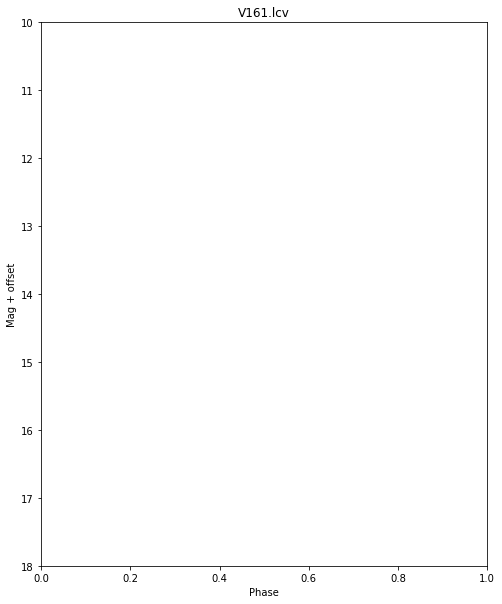

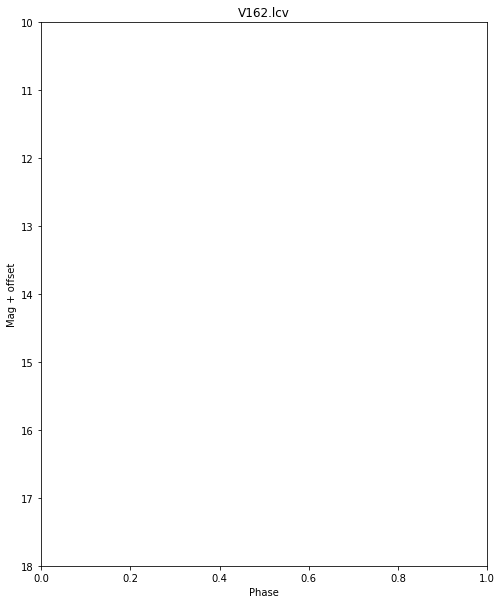

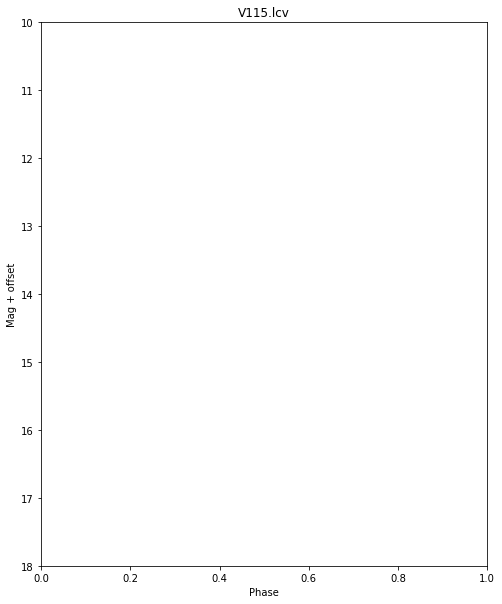

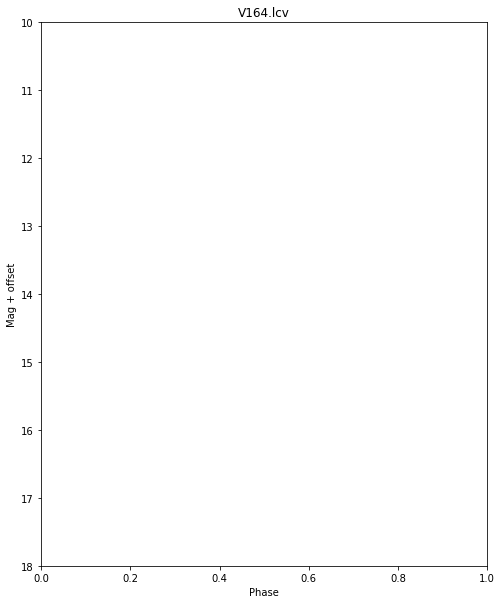

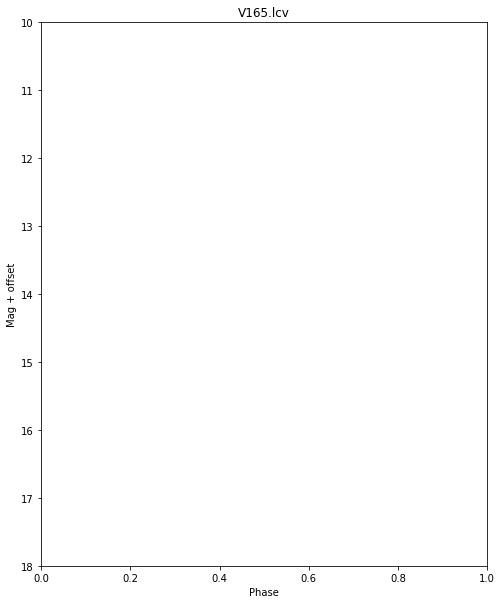

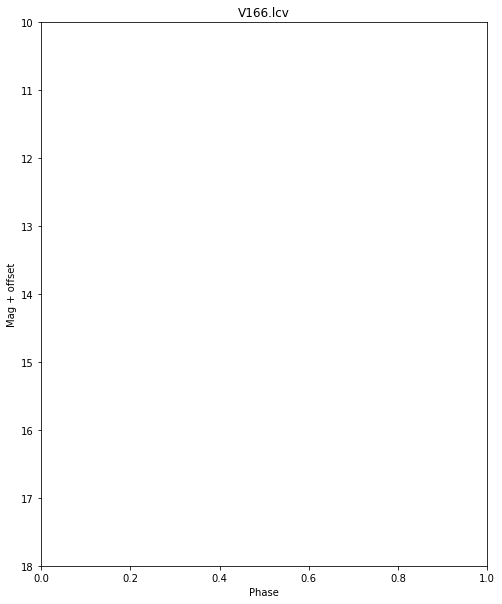

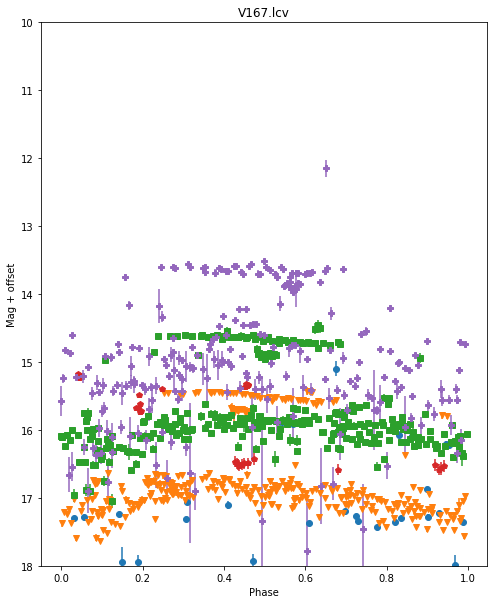

V85=  not found.
V169  not found.
V95=  not found.
V79=  not found.
V172  not found.
V173  not found.
V174  not found.
V175  not found.
V155  not found.
V177  not found.
V178  not found.
V181  not found.


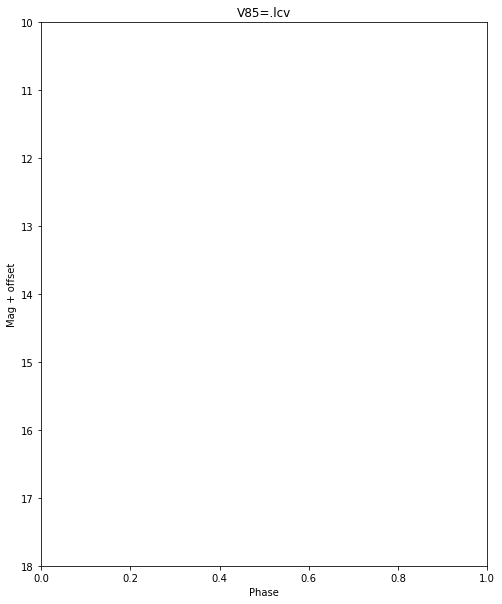

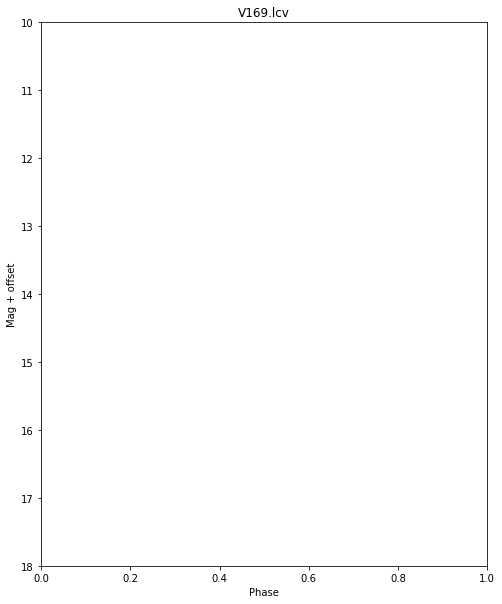

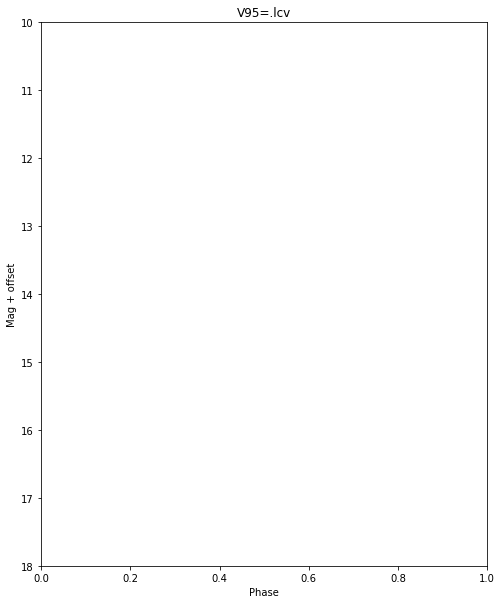

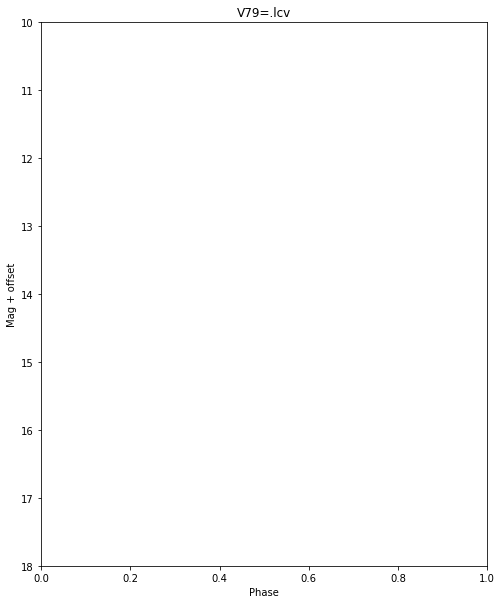

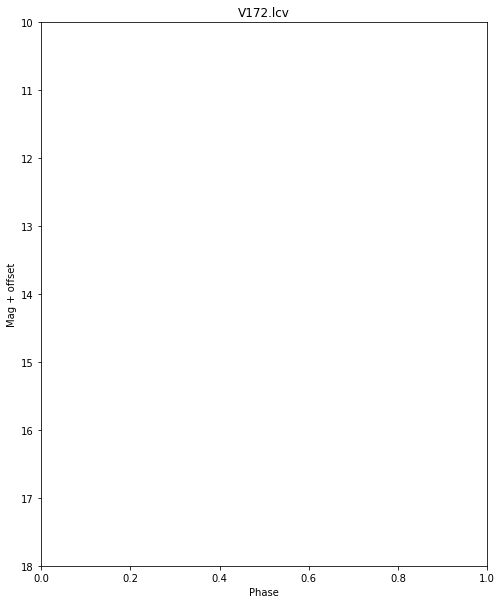

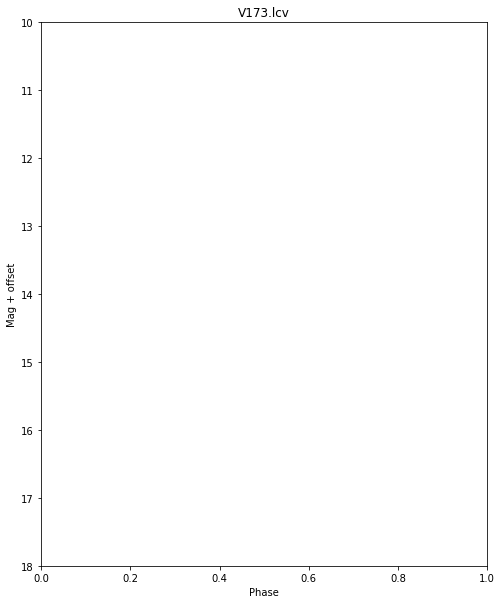

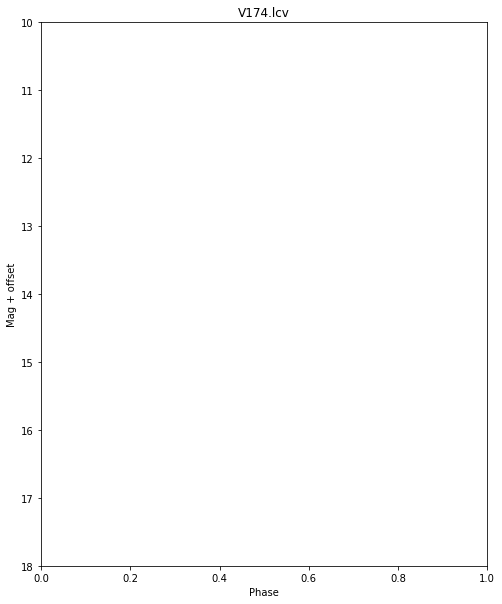

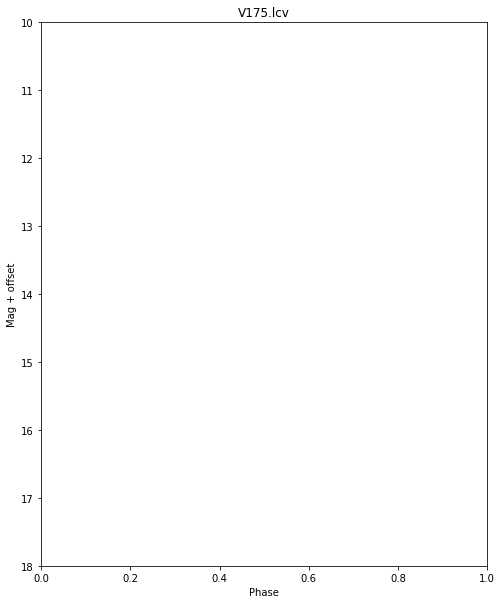

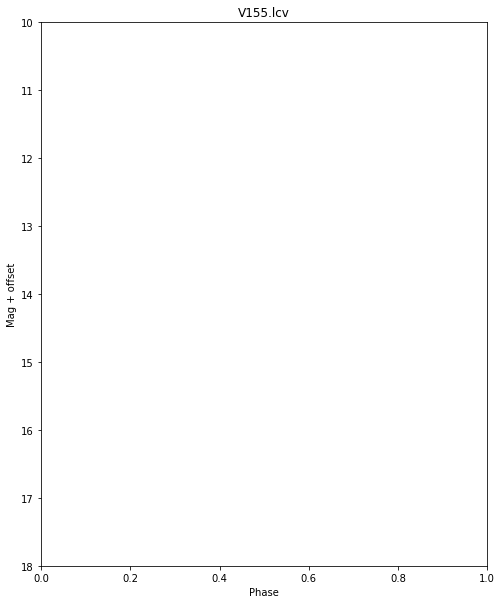

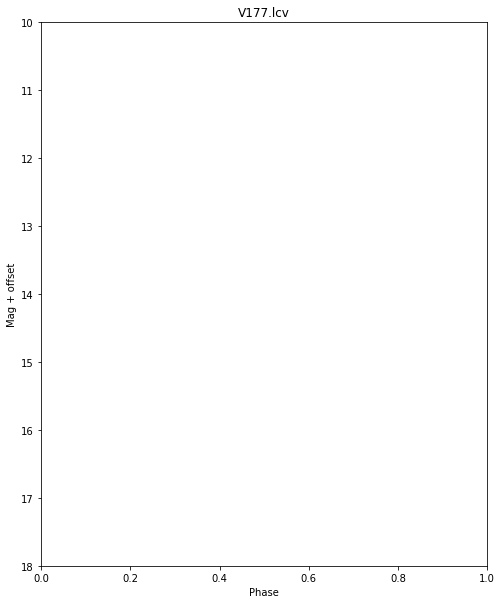

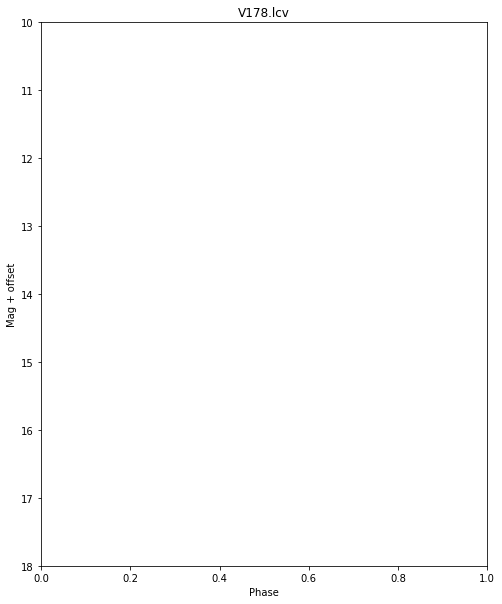

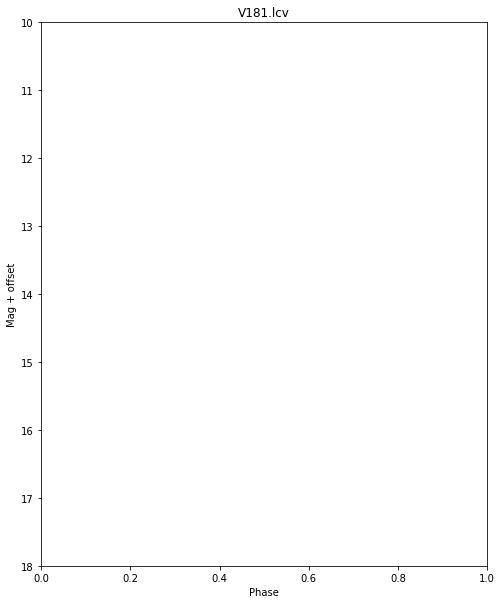

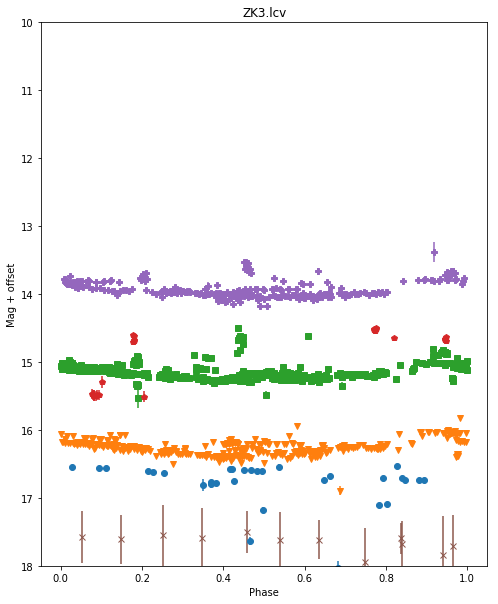

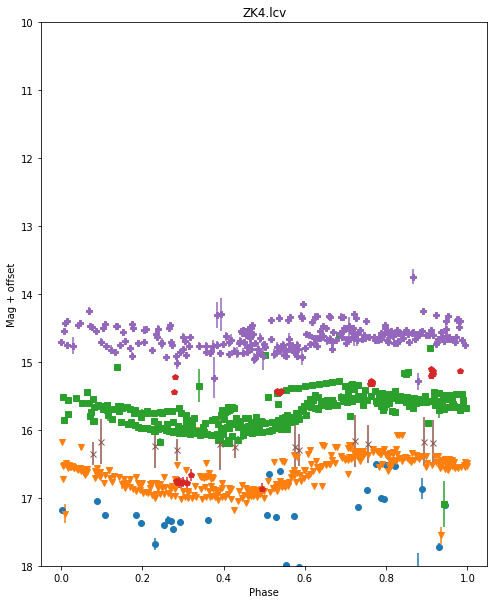

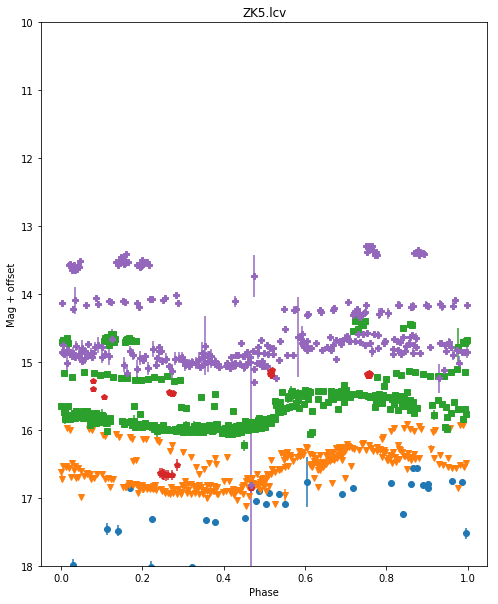

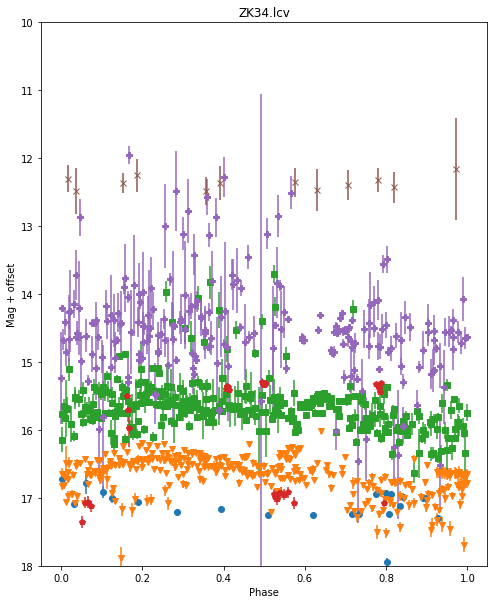

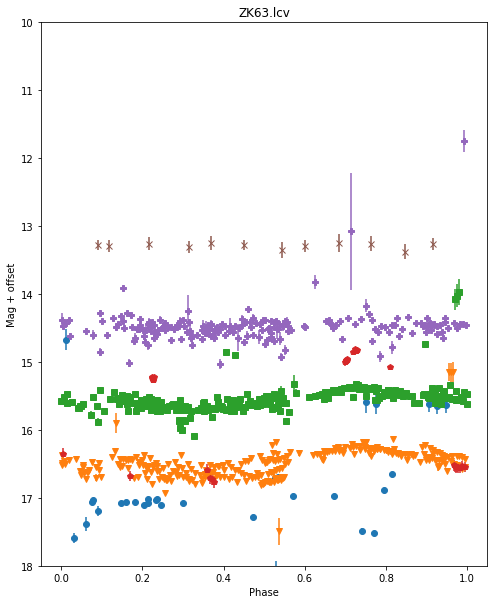

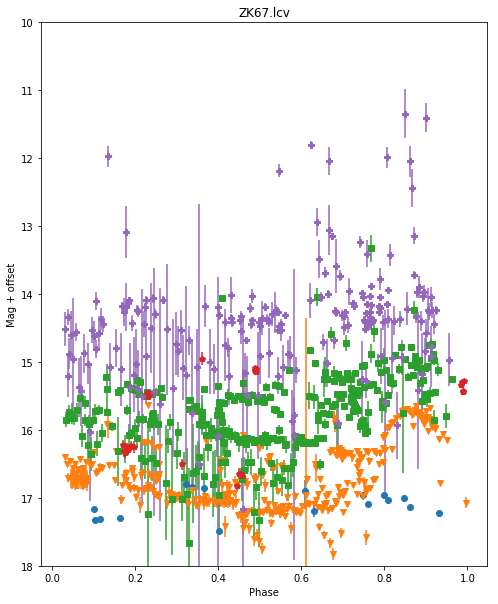

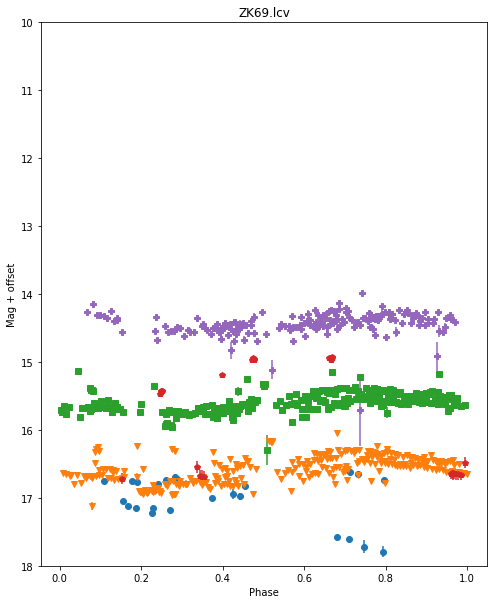

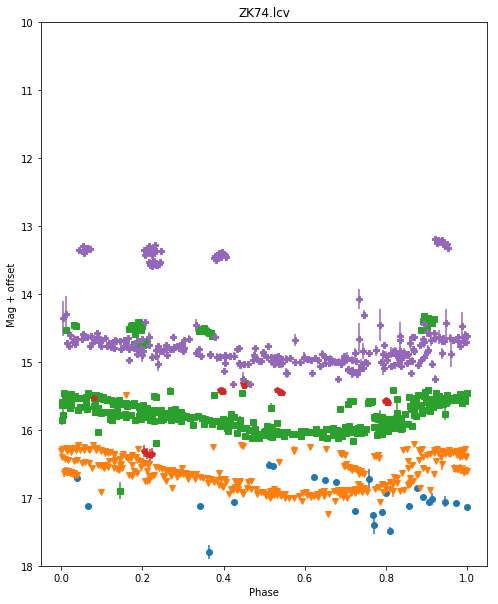

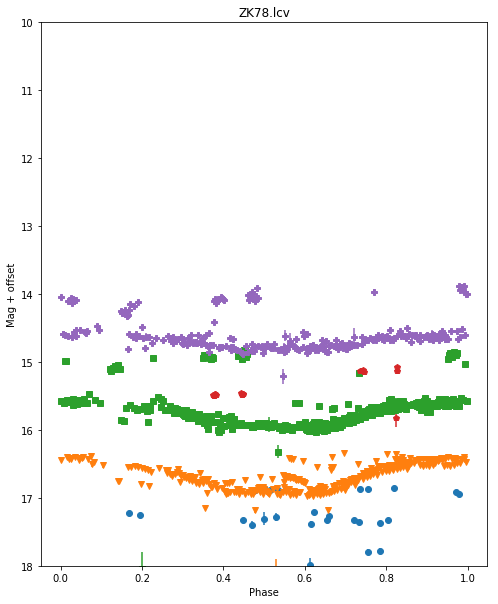

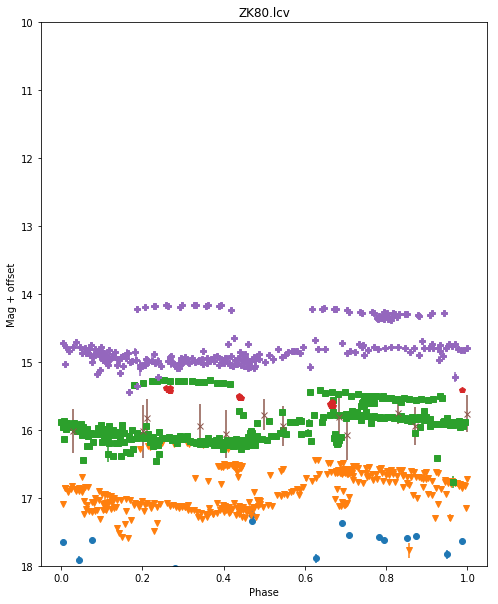

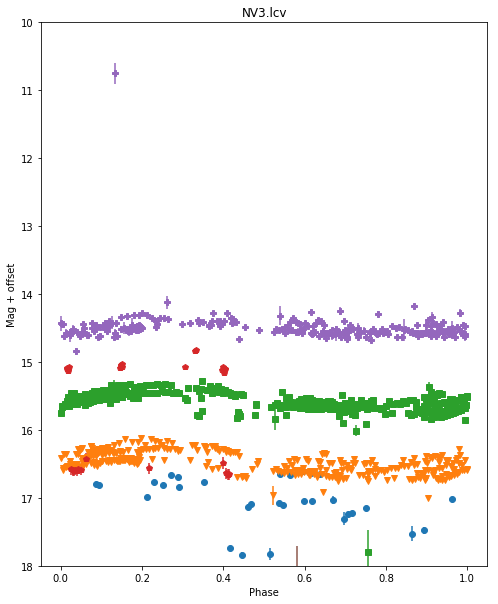

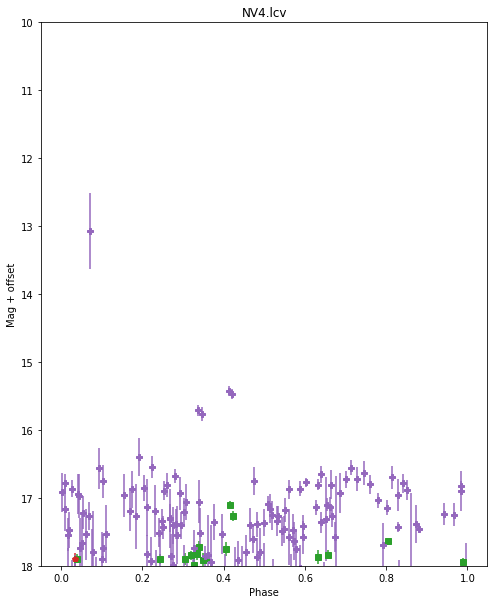

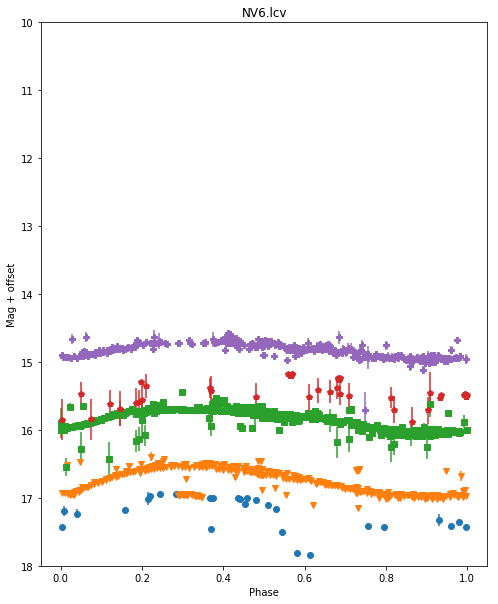

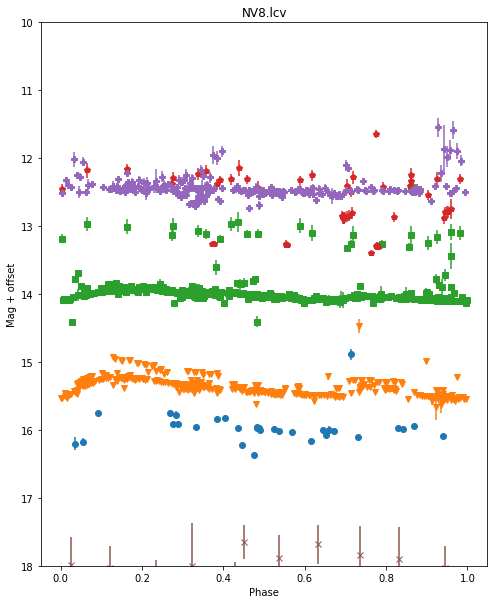

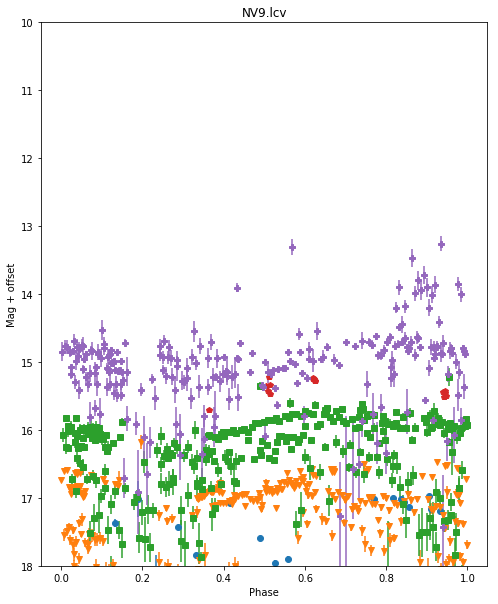

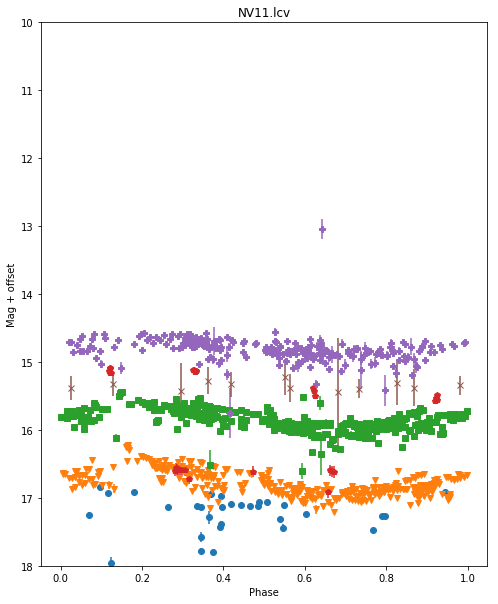

In [6]:
dtype1 = np.dtype([('id', 'S4'), ('cc_period', float), ('new_period', float)])
data = np.loadtxt(folder+target+'-variables.txt', dtype=dtype1, usecols=(0,1,2))
for ind, star in enumerate(data['id']):
    try:
        if np.isnan(data['new_period'][ind]):
          #  lightcurves.phase_lcv(folder+'lcvs/mir/'+star+'.lcv', data['cc_period'][ind], 0, save=1)
            lightcurves.phase_lcv_all_bands(target, star+'.lcv',data['cc_period'][ind], 0, bin_mir=1, folder=folder)
        else:
          #  lightcurves.phase_lcv(folder+'lcvs/mir/'+star+'.lcv', data['new_period'][ind], 0, save=1)
            lightcurves.phase_lcv_all_bands(target, star+'.lcv',data['new_period'][ind], 0, bin_mir=1, folder=folder)
    except:
        print star, ' not found.'
        continue

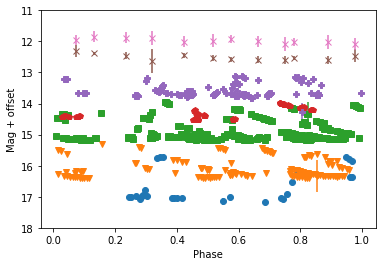

In [7]:
lightcurves.phase_lcv_all_bands(target, 'V5.lcv',0.63001681, 0, optical_lcv=1, mir_lcv=1, bin_mir=1)

/Users/jrneeley/CRRP/NGC3201/lcvs/V4.phased


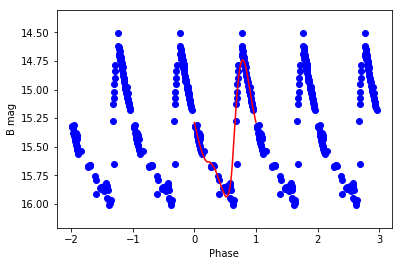

B 15.3609216063 1.19658311079


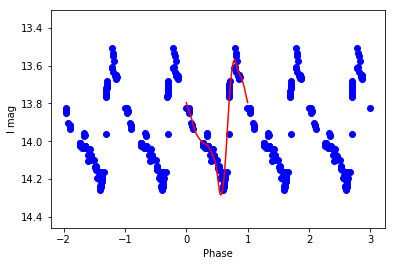

I 13.8991747816 0.714946296132


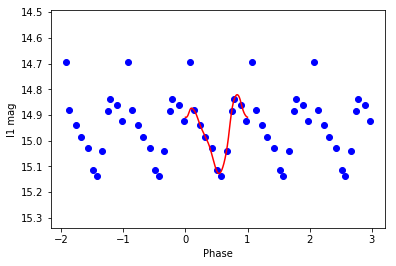

I1 14.954721289 0.307169760369


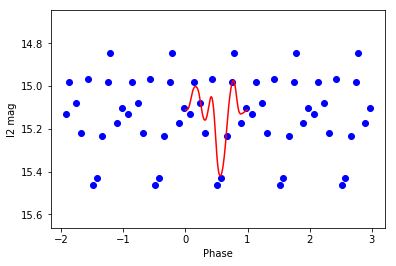

I2 15.1237176349 0.446333936528


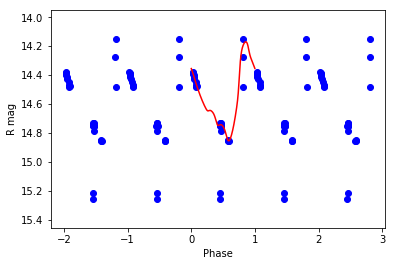

R 14.5326872955 0.683948887


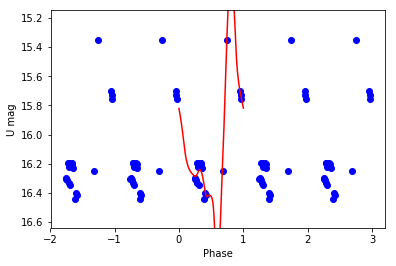

U 15.9125939993 2.10002461504


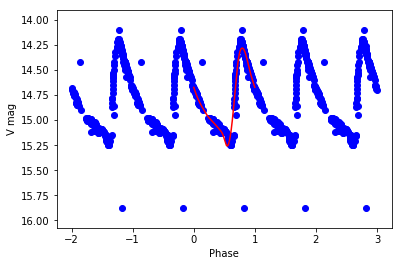

V 14.7757498575 0.9744456064


In [6]:
r1, r2 = lightcurves.gloess(folder+'lcvs/V4.phased')

[ 0.50735529  0.51744666  0.52132738  0.52275827  0.52505906  0.52972794
  0.54542697  0.55021269  0.57163756  0.57537959]


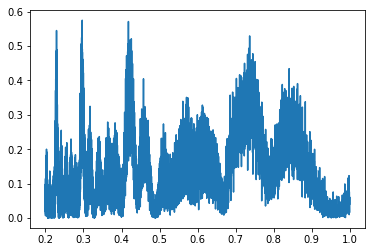

array([ 0.29451268,  0.42156077,  0.42579739,  0.29562724,  0.29524316,
        0.73679169,  0.22919293,  0.29671504,  0.41817574,  0.29678549])

In [6]:
#lcv_file = folder+'lcvs/optical/'+target+'V66.lcv'
#U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)

lightcurves.period_search_LS(V,'NV3')